Question 1:

### Method 1:

In [9]:
import json
files=['ECE219_tweet_data/tweets_#gohawks.txt','ECE219_tweet_data/tweets_#gopatriots.txt',
       'ECE219_tweet_data/tweets_#nfl.txt','ECE219_tweet_data/tweets_#patriots.txt',
       'ECE219_tweet_data/tweets_#sb49.txt','ECE219_tweet_data/tweets_#superbowl.txt']
number_of_tweets=[]
number_of_followers=[]
number_of_retweets=[]
average_tweets_per_hour=[]
average_numebr_of_followers=[]
average_number_of_retweets=[]

for i in range(len(files)):
    time=[]
    num_of_tweets=0
    num_of_followers=0
    num_of_retweets=0
    avg_tweets_per_hour=0
    avg_number_of_follower=0
    avg_number_of_retweets=0
    with open(files[i],'r') as text:
        for line in text:
            json_object = json.loads(line)
            num_of_tweets= num_of_tweets+1
            num_of_followers= num_of_followers + json_object['author']['followers']
            num_of_retweets= num_of_retweets + json_object['metrics']['citations']['total']
            time.append(json_object['citation_date'])
        print('hashtag#=',i, 'num_of_tweets=', num_of_tweets)
        print('hashtag#=',i, 'num_of_followers=', num_of_followers)
        print('hashtag#=',i, 'num_of_retweets=',num_of_retweets)
        number_of_tweets.append(num_of_tweets)
        number_of_followers.append(num_of_followers)
        number_of_retweets.append(num_of_retweets)
        
        time_range = (max(time)-min(time))/3600
        avg_tweets_per_hour=num_of_tweets/time_range
        avg_number_of_followers=num_of_followers/num_of_tweets
        avg_number_of_retweets=num_of_retweets/num_of_tweets
        print('hashtag#=',i, 'avg_tweets_per_hour=', avg_tweets_per_hour)
        print('hashtag#=',i, 'avg_number_of_followers=', avg_number_of_followers)
        print('hashtag#=',i, 'avg_number_of_retweets=', avg_number_of_retweets)
        average_tweets_per_hour.append(avg_tweets_per_hour)
        average_numebr_of_followers.append(avg_number_of_followers)
        average_number_of_retweets.append(avg_number_of_retweets)
        
print('number_of_tweets for all 6 hashtags=', number_of_tweets)
print('number_of_followers for all 6 hashtags=', number_of_followers)
print('number_of_retweets for all 6 hashtags=', number_of_retweets)
print('average_tweets_per_hour for all 6 hashtags=', average_tweets_per_hour)
print('average_numebr_of_followers for all 6 hashtags=', average_numebr_of_followers)
print('average_number_of_retweets for all 6 hashtags=', average_number_of_retweets)

hashtag#= 0 num_of_tweets= 169122
hashtag#= 0 num_of_followers= 375099698.0
hashtag#= 0 num_of_retweets= 340478
hashtag#= 0 avg_tweets_per_hour= 292.48785062173687
hashtag#= 0 avg_number_of_followers= 2217.9237355281984
hashtag#= 0 avg_number_of_retweets= 2.0132093991319877
hashtag#= 1 num_of_tweets= 23511
hashtag#= 1 num_of_followers= 33556136.0
hashtag#= 1 num_of_retweets= 33108
hashtag#= 1 avg_tweets_per_hour= 40.95469800606194
hashtag#= 1 avg_number_of_followers= 1427.2526051635405
hashtag#= 1 avg_number_of_retweets= 1.4081919101697078
hashtag#= 2 num_of_tweets= 233022
hashtag#= 2 num_of_followers= 1086436051.0
hashtag#= 2 num_of_retweets= 357563
hashtag#= 2 avg_tweets_per_hour= 397.0213901819841
hashtag#= 2 avg_number_of_followers= 4662.37544523693
hashtag#= 2 avg_number_of_retweets= 1.5344602655543254
hashtag#= 3 num_of_tweets= 440621
hashtag#= 3 num_of_followers= 1445441135.0
hashtag#= 3 num_of_retweets= 786635
hashtag#= 3 avg_tweets_per_hour= 750.89426460689
hashtag#= 3 avg_num

### Method 2:

In [3]:
import glob

datafilenames = [i for i in glob.iglob('ECE219_tweet_data/*.txt')]
datafilenames

['ECE219_tweet_data/tweets_#nfl.txt',
 'ECE219_tweet_data/tweets_#superbowl.txt',
 'ECE219_tweet_data/tweets_#sb49.txt',
 'ECE219_tweet_data/tweets_#patriots.txt',
 'ECE219_tweet_data/tweets_#gohawks.txt',
 'ECE219_tweet_data/tweets_#gopatriots.txt']

In [ ]:
import json
import pickle, gzip
import os

OVERWRITE_PICKLE_OBJECTS = True

def dict_xpath_get(mydict, path):
    elem = mydict
    try:
        for x in path.strip("/").split("/"):
            try:
                x = int(x)
                elem = elem[x]
            except ValueError:
                elem = elem.get(x)
    except:
        pass

    return elem

def feature_extract(tweet_dict, feature_selectors):
    extracted_dict = dict()
    for f in feature_selectors:
        selector = feature_selectors[f]
        extracted_dict[f] = dict_xpath_get(tweet_dict, selector)
    return extracted_dict


feature_selectors1 = {
    'time'         : '/citation_date',
    #'time_ori'     : '/firstpost_date',
    're_count'     : '/metrics/citations/total',
    'fo_count'     : '/author/followers',
}

In [7]:
for fn in datafilenames:
    if os.path.isfile(fn+'.pkl.gz') and not OVERWRITE_PICKLE_OBJECTS:
        print(fn+'.pkl.gz'+'\texists.')
#         with gzip.open(fn+'.pkl.gz', 'rb') as f:
#             tweets_features = pickle.load(f)
#         print(fn+'.pkl.gz'+'\tloaded.')
    else:
        tweets_features = dict()
        for f in feature_selectors1:
            tweets_features[f] = []

        with open(fn,'rb') as d:
            for ind, line in enumerate(d):
                #if ind > 1000:
                #    break
                tweet_dict = json.loads(line)
                feature_dict = feature_extract(tweet_dict, feature_selectors1)
                for f in feature_dict:
                    tweets_features[f].append(feature_dict[f])
        with gzip.open(fn+'.pkl.gz','wb') as p:
            pickle.dump(tweets_features,p,protocol=pickle.HIGHEST_PROTOCOL)
        print(fn+'.pkl.gz'+'\tsaved.')

ECE219_tweet_data/tweets_#nfl.txt.pkl.gz	saved.
ECE219_tweet_data/tweets_#superbowl.txt.pkl.gz	saved.
ECE219_tweet_data/tweets_#sb49.txt.pkl.gz	saved.
ECE219_tweet_data/tweets_#patriots.txt.pkl.gz	saved.
ECE219_tweet_data/tweets_#gohawks.txt.pkl.gz	saved.
ECE219_tweet_data/tweets_#gopatriots.txt.pkl.gz	saved.


In [4]:
import pandas as pd
based_dir = 'ECE219_tweet_data/'

df=[]
i=0
for hashtag in ['superbowl', 'nfl', 'gohawks', 'gopatriots', 'patriots', 'sb49']:
    with gzip.open(based_dir + 'tweets_#' + hashtag +'.txt.pkl.gz', 'rb') as f:
        features = pickle.load(f)
        df.append(pd.DataFrame(features))
        i+=1

In [5]:
df

[         fo_count  re_count        time
 0            22.0         2  1421468497
 1            22.0        15  1421467579
 2           858.0         2  1421266957
 3         14335.0         2  1421261298
 4          1143.0         7  1421316031
 5           426.0        34  1421361834
 6          5869.0         3  1421496104
 7            49.0        10  1421229873
 8            14.0         6  1421240845
 9             0.0        11  1421267311
 10           64.0         3  1421263513
 11           75.0         3  1421358185
 12           14.0         2  1421332428
 13          169.0        10  1421249088
 14          755.0         4  1421342378
 15           42.0         6  1421320610
 16         9830.0         4  1421245714
 17         1333.0         4  1421251241
 18          124.0         2  1421368879
 19          879.0        33  1421231928
 20         1535.0         2  1421249280
 21          119.0         2  1421250465
 22         2154.0         3  1421320051
 23         1398

In [6]:
import pytz

for i in range(0,6):
    df[i]['citetime'] = pd.to_datetime(df[i]['time'], unit='s')
    utc_tz = pytz.UTC
    pst_tz = pytz.timezone('America/Los_Angeles')
    df[i]['citetime_pst'] = pd.to_datetime(df[i]['time'], unit='s').apply(lambda x: x.tz_localize(utc_tz).astimezone(pst_tz))

In [7]:
df[0]

,fo_count,re_count,time,citetime,citetime_pst
0,22.0,2,1421468497,2015-01-17 04:21:37,2015-01-16 20:21:37-08:00
1,22.0,15,1421467579,2015-01-17 04:06:19,2015-01-16 20:06:19-08:00
2,858.0,2,1421266957,2015-01-14 20:22:37,2015-01-14 12:22:37-08:00
3,14335.0,2,1421261298,2015-01-14 18:48:18,2015-01-14 10:48:18-08:00
4,1143.0,7,1421316031,2015-01-15 10:00:31,2015-01-15 02:00:31-08:00
5,426.0,34,1421361834,2015-01-15 22:43:54,2015-01-15 14:43:54-08:00
6,5869.0,3,1421496104,2015-01-17 12:01:44,2015-01-17 04:01:44-08:00
7,49.0,10,1421229873,2015-01-14 10:04:33,2015-01-14 02:04:33-08:00
8,14.0,6,1421240845,2015-01-14 13:07:25,2015-01-14 05:07:25-08:00
9,0.0,11,1421267311,2015-01-14 20:28:31,2015-01-14 12:28:31-08:00


In [130]:
df[0].sort_values(by=['citetime_pst'], ascending=True)

,fo_count,re_count,time,citetime,citetime_pst,citetime_pst_hr
25,20.0,1,1421223187,2015-01-14 08:13:07,2015-01-14 00:13:07-08:00,0
26,1495.0,1,1421223224,2015-01-14 08:13:44,2015-01-14 00:13:44-08:00,0
27,258.0,1,1421223711,2015-01-14 08:21:51,2015-01-14 00:21:51-08:00,0
28,353.0,1,1421224280,2015-01-14 08:31:20,2015-01-14 00:31:20-08:00,0
29,142.0,1,1421224701,2015-01-14 08:38:21,2015-01-14 00:38:21-08:00,0
30,544.0,2,1421224786,2015-01-14 08:39:46,2015-01-14 00:39:46-08:00,0
31,142.0,1,1421224793,2015-01-14 08:39:53,2015-01-14 00:39:53-08:00,0
32,227.0,1,1421225581,2015-01-14 08:53:01,2015-01-14 00:53:01-08:00,0
33,755.0,1,1421226807,2015-01-14 09:13:27,2015-01-14 01:13:27-08:00,1
34,7605.0,1,1421227763,2015-01-14 09:29:23,2015-01-14 01:29:23-08:00,1


In [41]:
Average_tweets_per_hour=[]
Average_numebr_of_followers=[]
Average_number_of_retweets=[]
for i in range(0,6):
    Average_tweets_per_hour.append(len(df[i])/((max(df[i]['time'])-min(df[i]['time']))/3600))
    Average_numebr_of_followers.append(sum(df[i]['fo_count'])/len(df[i]))
    Average_number_of_retweets.append(sum(df[i]['re_count'])/len(df[i]))
print('Average_tweets_per_hour=', Average_tweets_per_hour)
print('Average_numebr_of_followers=', Average_numebr_of_followers)
print('Average_number_of_retweets=', Average_number_of_retweets)

Average_tweets_per_hour= [2072.11840170408, 397.0213901819841, 292.48785062173687, 40.95469800606194, 750.89426460689, 1276.8570598680474]
Average_numebr_of_followers= [8814.96799424623, 4662.37544523693, 2217.9237355281984, 1427.2526051635405, 3280.4635616550277, 10374.160292019487]
Average_number_of_retweets= [2.3911895819207736, 1.5344602655543254, 2.0132093991319877, 1.4081919101697078, 1.7852871288476946, 2.52713444111402]


Question 2:

In [12]:
df_windowed0 = df[0].groupby(pd.Grouper(key='citetime_pst', freq="60Min")).size().reset_index(name='count')
df_windowed1 = df[1].groupby(pd.Grouper(key='citetime_pst', freq="60Min")).size().reset_index(name='count')
print(df_windowed0)
print(df_windowed1)

                 citetime_pst  count
0   2015-01-14 00:00:00-08:00      8
1   2015-01-14 01:00:00-08:00      6
2   2015-01-14 02:00:00-08:00     12
3   2015-01-14 03:00:00-08:00     10
4   2015-01-14 04:00:00-08:00     11
5   2015-01-14 05:00:00-08:00     10
6   2015-01-14 06:00:00-08:00     19
7   2015-01-14 07:00:00-08:00     31
8   2015-01-14 08:00:00-08:00     55
9   2015-01-14 09:00:00-08:00     51
10  2015-01-14 10:00:00-08:00     63
11  2015-01-14 11:00:00-08:00     49
12  2015-01-14 12:00:00-08:00     48
13  2015-01-14 13:00:00-08:00     60
14  2015-01-14 14:00:00-08:00     46
15  2015-01-14 15:00:00-08:00     28
16  2015-01-14 16:00:00-08:00     22
17  2015-01-14 17:00:00-08:00     20
18  2015-01-14 18:00:00-08:00     16
19  2015-01-14 19:00:00-08:00     31
20  2015-01-14 20:00:00-08:00     28
21  2015-01-14 21:00:00-08:00     16
22  2015-01-14 22:00:00-08:00     15
23  2015-01-14 23:00:00-08:00     14
24  2015-01-15 00:00:00-08:00      8
25  2015-01-15 01:00:00-08:00     15
2

In [36]:
from matplotlib import pyplot as plt
#import matplotlib.dates as mdates
%matplotlib inline 

def tweets_per_hour_hist(x,y):
    plt.bar(x,y,1)
    plt.xticks(rotation=90)
    plt.xlabel('Time')
    plt.ylabel('Number Of Tweets')
    plt.title('Number of tweets in hour over time')

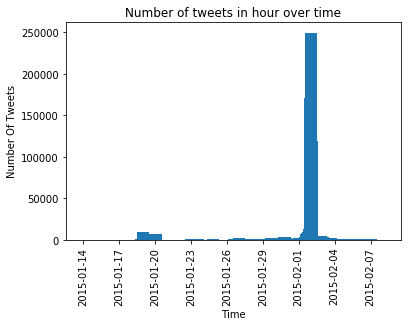

In [37]:
tweets_per_hour_hist(df_windowed0['citetime_pst'],df_windowed0['count'])

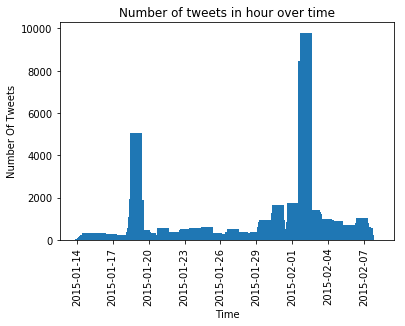

In [29]:
tweets_per_hour_hist(df_windowed1['citetime_pst'],df_windowed1['count'])

Question 3:

In [26]:
import numpy as np
import statsmodels.api as sm

def lr(i):
    df_tweets = df[i].groupby(pd.Grouper(key='citetime_pst', freq="60Min")).size().reset_index(name='count')
    df_retweets = df[i].groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'re_count': 'sum'})
    df_followers = df[i].groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'fo_count': 'sum'})
    
    df_followers_max = df[i].groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'fo_count': 'max'})
    df_followers_max= df_followers_max.fillna(value=0)
    
    df[i]['citetime_pst_hr']=df[i]['citetime_pst'].dt.hour
    # GroupBy.count() (with the default as_index=True) return the grouping column both as index and as column, while other methods as first and sum keep it only as the index 
    # rename_axis('citetime_pst').reset_index() makes index a column that call be called using df['column_name']
    df_hour = df[i].groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'citetime_pst_hr': 'mean'}).rename_axis('citetime_pst').reset_index()
    df_hour['citetime_pst_HR'] = df_hour['citetime_pst'].dt.hour
    
    X=np.stack(( np.array(df_tweets['count'][:-1]),np.array(df_retweets['re_count'][:-1]), 
            np.array(df_followers['fo_count'][:-1]),np.array(df_followers_max['fo_count'][:-1]),
            np.array(df_hour['citetime_pst_HR'][:-1]),), axis=-1)
    y=np.array(df_tweets['count'][1:])
    
    model = sm.OLS(y,X)
    results = model.fit()
    print(results.summary())
    print('MSE=', results.mse_resid) #use mse_resid, not mse_total to calculate MSE

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [60]:
print('#superbowl')
lr(0)

#superbowl
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     473.8
Date:                Sat, 02 Jun 2018   Prob (F-statistic):          2.80e-202
Time:                        19:26:55   Log-Likelihood:                -6039.9
No. Observations:                 586   AIC:                         1.209e+04
Df Residuals:                     581   BIC:                         1.211e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.2765      0.080     28.5

MSE= 52940707.43276811, R-squared= 0.803. 
x5, which is the time of the day, is not a significant feature to this linear regression model because it has p_value=0.278 > 0.05

In [61]:
print('#nfl')
lr(1)

#nfl
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     217.8
Date:                Sat, 02 Jun 2018   Prob (F-statistic):          1.23e-130
Time:                        19:37:15   Log-Likelihood:                -4500.0
No. Observations:                 586   AIC:                             9010.
Df Residuals:                     581   BIC:                             9032.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6317      0.134      4.718    

MSE= 276204.97420602443, R-squared= 0.652. 
all 5 features are significant to this linear regression model because it has p_value less than 0.05

In [62]:
print('#gohawks')
lr(2)

#gohawks
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     116.5
Date:                Sat, 02 Jun 2018   Prob (F-statistic):           7.10e-85
Time:                        19:37:30   Log-Likelihood:                -4733.9
No. Observations:                 578   AIC:                             9478.
Df Residuals:                     573   BIC:                             9500.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.2856      0.164      7.843

MSE= 767604.062129414, R-squared= 0.504. 
x4, which is the maximum number of followers of the users posting the hashtag, is not a significant feature to this linear regression model because it has p_value=0.631 > 0.05

In [63]:
print('#gopatriots')
lr(3)

#gopatriots
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     199.9
Date:                Sat, 02 Jun 2018   Prob (F-statistic):          9.65e-123
Time:                        19:37:56   Log-Likelihood:                -3749.3
No. Observations:                 574   AIC:                             7509.
Df Residuals:                     569   BIC:                             7530.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3081      0.284      1.

MSE= 27852.726078830932, R-squared= 0.637.  
x1(Number of tweets), x3(sum of the number of followers of the users posting the hashtag), x4(maximum number of followers of the users posting the hashtag), and x5(time of the day) are not significant features to this linear regression model because they have p_value larger than 0.05

In [64]:
print('#patriots')
lr(4)

#patriots
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     246.3
Date:                Sat, 02 Jun 2018   Prob (F-statistic):          5.98e-141
Time:                        19:38:08   Log-Likelihood:                -5361.9
No. Observations:                 586   AIC:                         1.073e+04
Df Residuals:                     581   BIC:                         1.076e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9148      0.071     12.94

MSE= 5234121.858285548, R-squared= 0.679. 
x2(total number of retweets), x3(sum of the number of followers of the users posting the hashtag), x4(maximum number of followers of the users posting the hashtag), and x5(time of the day) are not significant features to this linear regression model because they have p_value larger than 0.05

In [65]:
print('#sb49')
lr(5)

#sb49
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     486.4
Date:                Sat, 02 Jun 2018   Prob (F-statistic):          3.24e-204
Time:                        19:38:31   Log-Likelihood:                -5656.6
No. Observations:                 582   AIC:                         1.132e+04
Df Residuals:                     577   BIC:                         1.134e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1374      0.087     13.042   

MSE= 16339907.666309506, R-squared= 0.808. 
x3(sum of the number of followers of the users posting the hashtag) and x5(time of the day) are not significant features to this linear regression model because they have p_value larger than 0.05

Question 4:

Since time of the day feature is shown not significant for most hashtag dataset, I dropped that feature off from my linear regression model. 
In additional to the listed 4 features, I think number of followees, which indicate how popular this user is, and number of tweets this user has liked, which indicate how active this user is on Twitter, could be useful for prediction (and they are also fairly easy to access from Twitter API) so I added them into my regression model. 
The model shows lower MSE and higher R-squared value when I use those listed 4 features plus the two additional features I identified so I decided to stick with my model for Question 4-14

In [8]:
import json
import pickle, gzip
import os

OVERWRITE_PICKLE_OBJECTS = True

feature_selectors = {
    'time'         : '/citation_date',
    're_count'     : '/metrics/citations/total',
    'fo_count'     : '/author/followers',
    'friends'     : '/tweet/user/friends_count',  #number of followees 
    'fa_count'     : '/tweet/user/favourites_count', #The number of Tweets this user has liked in the account’s lifetime
}

for fn in datafilenames:
    if os.path.isfile(fn+'.pkl.gz') and not OVERWRITE_PICKLE_OBJECTS:
        print(fn+'.pkl.gz'+'\texists.')

    else:
        tweets_features = dict()
        for f in feature_selectors:
            tweets_features[f] = []

        with open(fn,'rb') as d:
            for ind, line in enumerate(d):
                #if ind > 1000:
                #    break
                tweet_dict = json.loads(line)
                feature_dict = feature_extract(tweet_dict, feature_selectors)
                for f in feature_dict:
                    tweets_features[f].append(feature_dict[f])
        with gzip.open(fn+'.pkl.gz','wb') as p:
            pickle.dump(tweets_features,p,protocol=pickle.HIGHEST_PROTOCOL)
        print(fn+'.pkl.gz'+'\tsaved.')

ECE219_tweet_data/tweets_#nfl.txt.pkl.gz	saved.
ECE219_tweet_data/tweets_#superbowl.txt.pkl.gz	saved.
ECE219_tweet_data/tweets_#sb49.txt.pkl.gz	saved.
ECE219_tweet_data/tweets_#patriots.txt.pkl.gz	saved.
ECE219_tweet_data/tweets_#gohawks.txt.pkl.gz	saved.
ECE219_tweet_data/tweets_#gopatriots.txt.pkl.gz	saved.


In [10]:
import pandas as pd
based_dir = 'ECE219_tweet_data/'

df2=[]
i=0
for hashtag in ['superbowl', 'nfl', 'gohawks', 'gopatriots', 'patriots', 'sb49']:
    with gzip.open(based_dir + 'tweets_#' + hashtag +'.txt.pkl.gz', 'rb') as f:
        features = pickle.load(f)
        df2.append(pd.DataFrame(features))
        i+=1
df2

[         fa_count  fo_count  friends  re_count        time
 0               0      22.0       17         2  1421468497
 1            1003      22.0      316        15  1421467579
 2             431     858.0     1987         2  1421266957
 3              19   14335.0      380         2  1421261298
 4            2602    1143.0   142440         7  1421316031
 5            1512     426.0    19911        34  1421361834
 6             164    5869.0     4595         3  1421496104
 7            1249      49.0      761        10  1421229873
 8             629      14.0      451         6  1421240845
 9              97       0.0      139        11  1421267311
 10            172      64.0      673         3  1421263513
 11             11      75.0       39         3  1421358185
 12              0      14.0       61         2  1421332428
 13           3922     169.0      650        10  1421249088
 14           4922     755.0     1770         4  1421342378
 15          73329      42.0    49088   

In [11]:
import pytz

for i in range(0,6):
    df2[i]['citetime'] = pd.to_datetime(df2[i]['time'], unit='s')
    utc_tz = pytz.UTC
    pst_tz = pytz.timezone('America/Los_Angeles')
    df2[i]['citetime_pst'] = pd.to_datetime(df2[i]['time'], unit='s').apply(lambda x: x.tz_localize(utc_tz).astimezone(pst_tz))

In [12]:
df2[0]

,fa_count,fo_count,friends,re_count,time,citetime,citetime_pst
0,0,22.0,17,2,1421468497,2015-01-17 04:21:37,2015-01-16 20:21:37-08:00
1,1003,22.0,316,15,1421467579,2015-01-17 04:06:19,2015-01-16 20:06:19-08:00
2,431,858.0,1987,2,1421266957,2015-01-14 20:22:37,2015-01-14 12:22:37-08:00
3,19,14335.0,380,2,1421261298,2015-01-14 18:48:18,2015-01-14 10:48:18-08:00
4,2602,1143.0,142440,7,1421316031,2015-01-15 10:00:31,2015-01-15 02:00:31-08:00
5,1512,426.0,19911,34,1421361834,2015-01-15 22:43:54,2015-01-15 14:43:54-08:00
6,164,5869.0,4595,3,1421496104,2015-01-17 12:01:44,2015-01-17 04:01:44-08:00
7,1249,49.0,761,10,1421229873,2015-01-14 10:04:33,2015-01-14 02:04:33-08:00
8,629,14.0,451,6,1421240845,2015-01-14 13:07:25,2015-01-14 05:07:25-08:00
9,97,0.0,139,11,1421267311,2015-01-14 20:28:31,2015-01-14 12:28:31-08:00


In [90]:
import numpy as np
import statsmodels.api as sm

def lr2(i):
    df2_tweets = df2[i].groupby(pd.Grouper(key='citetime_pst', freq="60Min")).size().reset_index(name='count')
    df2_retweets = df2[i].groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'re_count': 'sum'})
    df2_followers = df2[i].groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'fo_count': 'sum'})
    
    df2_followers_max = df2[i].groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'fo_count': 'max'})
    df2_followers_max= df2_followers_max.fillna(value=0)
    
    #total number of followees of the users posting the hashtag
    df2_friends = df2[i].groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'friends': 'sum'})    
    #total number of Tweets users posting this hashtag have liked in their accounts’ lifetime
    df2_favourites = df2[i].groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'fa_count': 'sum'})

    X=np.stack(( np.array(df2_tweets['count'][:-1]),np.array(df2_retweets['re_count'][:-1]), 
            np.array(df2_followers['fo_count'][:-1]),np.array(df2_followers_max['fo_count'][:-1]),
            np.array(df2_friends['friends'][:-1]),np.array(df2_favourites['fa_count'][:-1])), axis=-1)
    y=np.array(df2_tweets['count'][1:])
    
    #X = sm.add_constant(X)
    model = sm.OLS(y,X)
    results = model.fit()
    print(results.summary())
    print('MSE=', results.mse_resid) #use mse_resid, not mse_total to calculate MSE

In [91]:
print('#superbowl')
lr2(0)

#superbowl
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     516.3
Date:                Sun, 03 Jun 2018   Prob (F-statistic):          7.23e-229
Time:                        00:46:20   Log-Likelihood:                -5974.8
No. Observations:                 586   AIC:                         1.196e+04
Df Residuals:                     580   BIC:                         1.199e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.7210      0.463     -5.8

MSE= 42464396.775534175, R-squared= 0.842. 
all 6 features are significant to this linear regression model because they all have p_value less than 0.05

In [92]:
print('#nfl')
lr2(1)

#nfl
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     175.6
Date:                Sun, 03 Jun 2018   Prob (F-statistic):          6.49e-127
Time:                        00:52:27   Log-Likelihood:                -4505.9
No. Observations:                 586   AIC:                             9024.
Df Residuals:                     580   BIC:                             9050.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9179      0.266      3.449    

MSE= 282322.12226500903, R-squared= 0.645. 
x4(maximum number of followers of the users posting the hashtag), x5(total number of followees of the users posting the hashtag), and x6(total number of Tweets users posting this hashtag have liked in their accounts’ lifetime) are not significant features to this linear regression model because they have p_value larger than 0.05

In [93]:
print('#gohawks')
lr2(2)

#gohawks
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     165.1
Date:                Sun, 03 Jun 2018   Prob (F-statistic):          2.57e-121
Time:                        01:19:30   Log-Likelihood:                -4646.2
No. Observations:                 578   AIC:                             9304.
Df Residuals:                     572   BIC:                             9331.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.4371      0.307     -7.933

MSE= 567670.5533920593, R-squared= 0.634. 
all 6 features are significant to this linear regression model because they have p_value less than 0.05

In [94]:
print('#gopatriots')
lr2(3)

#gopatriots
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     339.9
Date:                Sun, 03 Jun 2018   Prob (F-statistic):          2.61e-184
Time:                        01:22:56   Log-Likelihood:                -3602.9
No. Observations:                 574   AIC:                             7218.
Df Residuals:                     568   BIC:                             7244.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.0027      0.327     12.

MSE= 16753.01381458136, R-squared= 0.782. 
x2(total number of retweets) is not a significant features to this linear regression model because it has p_value = 0.224 > 0.05

In [95]:
print('#patriots')
lr2(4)

#patriots
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     261.8
Date:                Sun, 03 Jun 2018   Prob (F-statistic):          2.05e-161
Time:                        01:30:50   Log-Likelihood:                -5311.3
No. Observations:                 586   AIC:                         1.063e+04
Df Residuals:                     580   BIC:                         1.066e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6247      0.250     -2.50

MSE= 4411684.183736083, R-squared= 0.730. 
x2(total number of retweets) is not a significant feature to this linear regression model because it has p_value = 0.359 > 0.05

In [96]:
print('#sb49')
lr2(5)

#sb49
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     408.4
Date:                Sun, 03 Jun 2018   Prob (F-statistic):          8.54e-204
Time:                        01:38:14   Log-Likelihood:                -5654.4
No. Observations:                 582   AIC:                         1.132e+04
Df Residuals:                     576   BIC:                         1.135e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.5378      0.251      6.131   

MSE= 16245021.368796103, R-squared= 0.810. 
x3(sum of the number of followers of the users posting the hashtag), x5(total number of followees of the users posting the hashtag), and x6(total number of Tweets users posting this hashtag have liked in their accounts’ lifetime) are not significant features to this linear regression model because they have p_value larger than 0.05

Question 5:

In [122]:
def predictant_feature_scatter(x,y):
    plt.subplots()
    plt.scatter(x,y)
    plt.xlabel("Feature Xt")
    plt.ylabel("y_pred")
    plt.title('Predictant vs Feature value')

In [113]:
df2_tweets=[]
df2_retweets=[]
df2_followers=[]
df2_followers_max=[]
df2_friends=[]
df2_favourites=[]
X=[]
y=[]
results=[]
y_pred=[]

for i in range(0,6):
    df2_tweets.append(df2[i].groupby(pd.Grouper(key='citetime_pst', freq="60Min")).size().reset_index(name='count')) 
    df2_retweets.append(df2[i].groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'re_count': 'sum'}))
    df2_followers.append(df2[i].groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'fo_count': 'sum'}))
    
    df2_fo_max = df2[i].groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'fo_count': 'max'})
    df2_followers_max.append(df2_fo_max.fillna(value=0))
    
    #total number of followees of the users posting the hashtag
    df2_friends.append(df2[i].groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'friends': 'sum'}))
    #total number of Tweets users posting this hashtag have liked in their accounts’ lifetime
    df2_favourites.append(df2[i].groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'fa_count': 'sum'}))

    X.append(np.stack(( np.array(df2_tweets[i]['count'][:-1]),np.array(df2_retweets[i]['re_count'][:-1]), 
                np.array(df2_followers[i]['fo_count'][:-1]),np.array(df2_followers_max[i]['fo_count'][:-1]),
                np.array(df2_friends[i]['friends'][:-1]),np.array(df2_favourites[i]['fa_count'][:-1])), axis=-1))
    y.append(np.array(df2_tweets[i]['count'][1:]))
    
    results.append(sm.OLS(y[i],X[i]).fit())
    y_pred.append(results[i].predict())

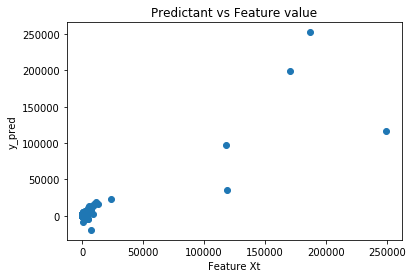

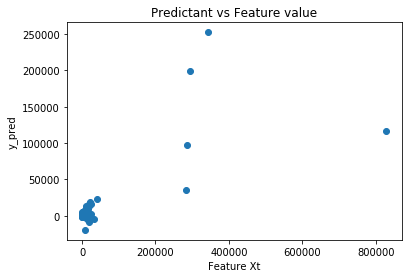

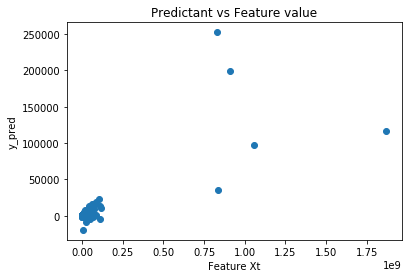

In [124]:
#top three features for #superbowl: x1, x2, x3
predictant_feature_scatter(np.array(df2_tweets[0]['count'][:-1]), y_pred[0]) 
predictant_feature_scatter(np.array(df2_retweets[0]['re_count'][:-1]), y_pred[0]) 
predictant_feature_scatter(np.array(df2_followers[0]['fo_count'][:-1]), y_pred[0]) 

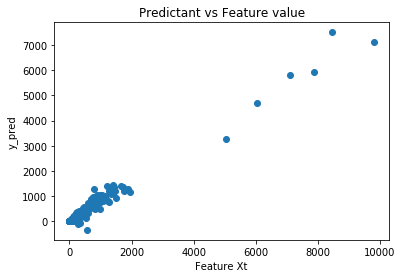

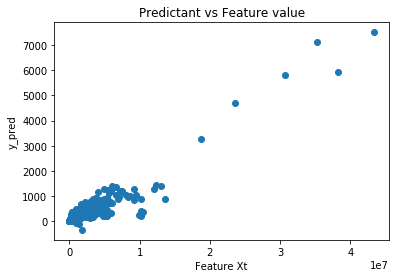

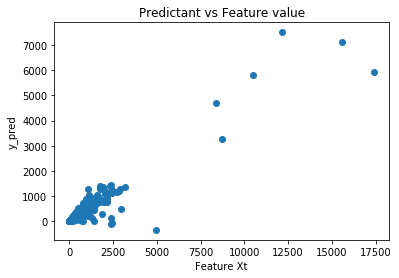

In [125]:
#top three features for #nfl: x1, x3, x2
predictant_feature_scatter(np.array(df2_tweets[1]['count'][:-1]), y_pred[1]) 
predictant_feature_scatter(np.array(df2_followers[1]['fo_count'][:-1]), y_pred[1]) 
predictant_feature_scatter(np.array(df2_retweets[1]['re_count'][:-1]), y_pred[1]) 

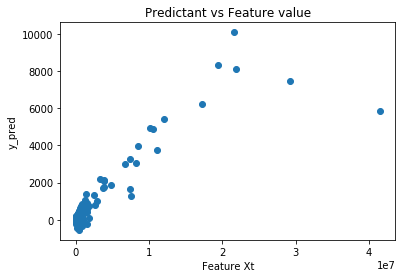

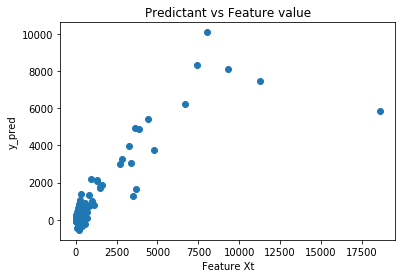

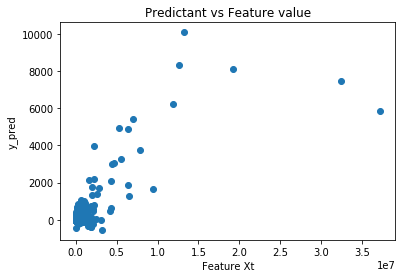

In [126]:
#top three features for #gohawks: x6, x1, x3
predictant_feature_scatter(np.array(df2_favourites[2]['fa_count'][:-1]), y_pred[2]) 
predictant_feature_scatter(np.array(df2_tweets[2]['count'][:-1]), y_pred[2]) 
predictant_feature_scatter(np.array(df2_followers[2]['fo_count'][:-1]), y_pred[2]) 

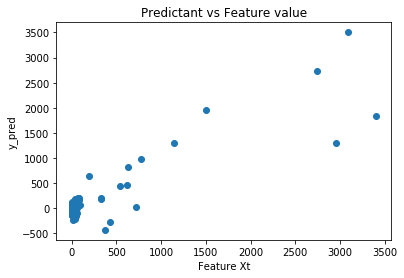

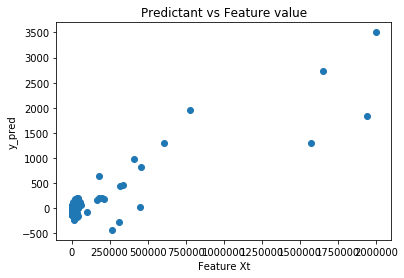

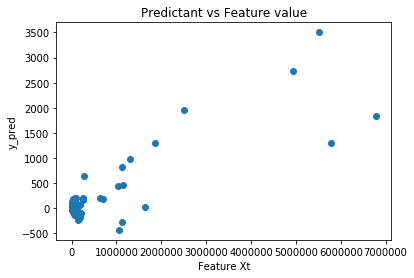

In [123]:
#top three features for #gopatriots: x1, x5, x6
predictant_feature_scatter(np.array(df2_tweets[3]['count'][:-1]), y_pred[3])  
predictant_feature_scatter(np.array(df2_friends[3]['friends'][:-1]), y_pred[3]) 
predictant_feature_scatter(np.array(df2_favourites[3]['fa_count'][:-1]), y_pred[3]) 

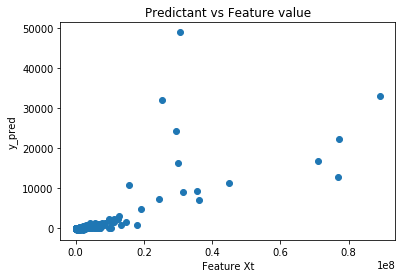

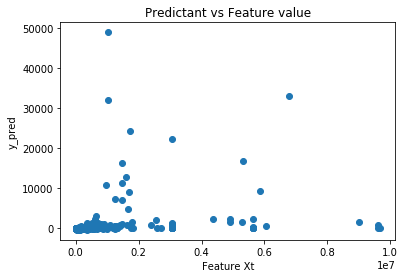

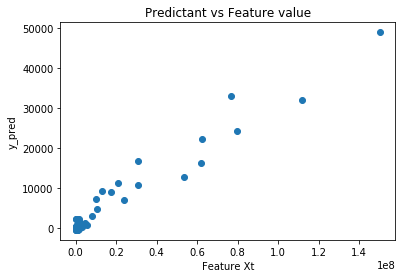

In [128]:
#top three features for #patriots: x3, x4, x6
predictant_feature_scatter(np.array(df2_followers[4]['fo_count'][:-1]), y_pred[4])  
predictant_feature_scatter(np.array(df2_followers_max[4]['fo_count'][:-1]), y_pred[4]) 
predictant_feature_scatter(np.array(df2_favourites[4]['fa_count'][:-1]), y_pred[4]) 

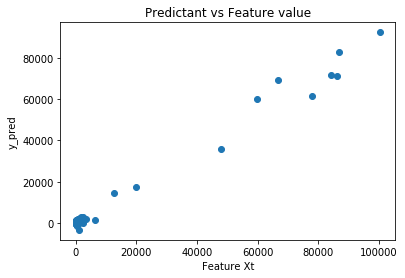

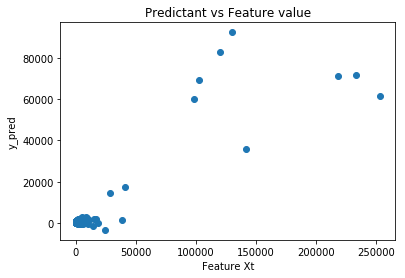

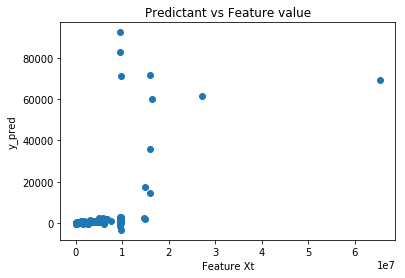

In [129]:
#top three features for #sb49: x1, x2, x4
predictant_feature_scatter(np.array(df2_tweets[5]['count'][:-1]), y_pred[5])  
predictant_feature_scatter(np.array(df2_retweets[5]['re_count'][:-1]), y_pred[5]) 
predictant_feature_scatter(np.array(df2_followers_max[5]['fo_count'][:-1]), y_pred[5]) 

The regression coefficients calculated from linear regression model not always agree with the trends in the plots. Because there are multiple attributes in the model and they all affect the prediction result in some extend. 
Reference: https://en.wikipedia.org/wiki/Multicollinearity
"Multicollinearity affects calculations regarding individual predictors. That is, a multivariate regression model with collinear predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others."

Question 6:

In [15]:
import time
from calendar import timegm
from datetime import datetime

iso_string = '2015-02-01T16:00:00Z' #8am PST is 4pm UTC
start_active = timegm(time.strptime(iso_string.replace('Z', 'GMT'),'%Y-%m-%dT%H:%M:%S%Z'))
print(start_active)
print('-> %s' % datetime.utcfromtimestamp(start_active).isoformat())
iso_string2 = '2015-02-02T4:00:00Z' #8pm PST is 02-02 4am UTC
end_active = timegm(time.strptime(iso_string2.replace('Z', 'GMT'),'%Y-%m-%dT%H:%M:%S%Z'))
print(end_active)
print('-> %s' % datetime.utcfromtimestamp(end_active).isoformat())

1422806400
-> 2015-02-01T16:00:00
1422849600
-> 2015-02-02T04:00:00


In [16]:
df2_before=[]
df2_between=[]
df2_after=[]
for i in range(0,6):
    df2_before.append(df2[i][df2[i].time < start_active])
    df2_between.append(df2[i][(df2[i].time >= start_active) & (df2[i].time <= end_active)])
    df2_after.append(df2[i][df2[i].time > end_active])

In [171]:
df2_before[1]

,fa_count,fo_count,friends,re_count,time,citetime,citetime_pst
0,170,41.0,20,4,1421517546,2015-01-17 17:59:06,2015-01-17 09:59:06-08:00
1,1504,361.0,1335,2,1421258906,2015-01-14 18:08:26,2015-01-14 10:08:26-08:00
2,474,6.0,453,2,1421518663,2015-01-17 18:17:43,2015-01-17 10:17:43-08:00
3,27,1364.0,590,2,1421380685,2015-01-16 03:58:05,2015-01-15 19:58:05-08:00
4,1121,580.0,30489,14,1421257471,2015-01-14 17:44:31,2015-01-14 09:44:31-08:00
5,1121,580.0,30489,11,1421257473,2015-01-14 17:44:33,2015-01-14 09:44:33-08:00
6,5212,381.0,314,57,1421526554,2015-01-17 20:29:14,2015-01-17 12:29:14-08:00
7,0,22.0,30,2,1421467019,2015-01-17 03:56:59,2015-01-16 19:56:59-08:00
8,16932,126.0,1677,233,1421278499,2015-01-14 23:34:59,2015-01-14 15:34:59-08:00
9,2249,800.0,855,21,1421371492,2015-01-16 01:24:52,2015-01-15 17:24:52-08:00


In [135]:
import numpy as np
import statsmodels.api as sm

def lr2_three_periods(DF, window):
    df2_tweets = DF.groupby(pd.Grouper(key='citetime_pst', freq=window)).size().reset_index(name='count')
    df2_retweets = DF.groupby(pd.Grouper(key='citetime_pst', freq=window)).agg({'re_count': 'sum'})
    df2_followers = DF.groupby(pd.Grouper(key='citetime_pst', freq=window)).agg({'fo_count': 'sum'})
    
    df2_followers_max = DF.groupby(pd.Grouper(key='citetime_pst', freq=window)).agg({'fo_count': 'max'})
    df2_followers_max= df2_followers_max.fillna(value=0)
    
    #total number of followees of the users posting the hashtag
    df2_friends = DF.groupby(pd.Grouper(key='citetime_pst', freq=window)).agg({'friends': 'sum'})    
    #total number of Tweets users posting this hashtag have liked in their accounts’ lifetime
    df2_favourites = DF.groupby(pd.Grouper(key='citetime_pst', freq=window)).agg({'fa_count': 'sum'})

    X=np.stack(( np.array(df2_tweets['count'][:-1]),np.array(df2_retweets['re_count'][:-1]), 
            np.array(df2_followers['fo_count'][:-1]),np.array(df2_followers_max['fo_count'][:-1]),
            np.array(df2_friends['friends'][:-1]),np.array(df2_favourites['fa_count'][:-1])), axis=-1)
    y=np.array(df2_tweets['count'][1:])

    model = sm.OLS(y,X)
    results = model.fit()
    print(results.summary())
    print('MSE=', results.mse_resid) #use mse_resid, not mse_total to calculate MSE

In [138]:
print('#superbowl')
lr2_three_periods(df2_before[0], "60Min")
lr2_three_periods(df2_between[0], "5Min")
lr2_three_periods(df2_after[0], "60Min")

#superbowl
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     91.54
Date:                Mon, 04 Jun 2018   Prob (F-statistic):           7.22e-74
Time:                        23:36:09   Log-Likelihood:                -3487.7
No. Observations:                 439   AIC:                             6987.
Df Residuals:                     433   BIC:                             7012.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2199      0.119      1.8

before 2015-02-01 8am PST, MSE= 472156.443503936, R-squared= 0.559
between 2015-02-01 8am - 8pm PST, MSE= 4553405.803151027, R-squared= 0.958
after 2015-02-01 8pm PST, MSE= 119277.73951797804, R-squared= 0.904

In [139]:
print('#nfl')
lr2_three_periods(df2_before[1], "60Min")
lr2_three_periods(df2_between[1], "5Min")
lr2_three_periods(df2_after[1], "60Min")

#nfl
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     147.6
Date:                Mon, 04 Jun 2018   Prob (F-statistic):          2.22e-101
Time:                        23:41:41   Log-Likelihood:                -3069.3
No. Observations:                 439   AIC:                             6151.
Df Residuals:                     433   BIC:                             6175.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8693      0.168      5.185    

before 2015-02-01 8am PST, MSE= 70210.11258489171, R-squared= 0.672
between 2015-02-01 8am - 8pm PST, MSE= 22620.552375827185, R-squared= 0.903
after 2015-02-01 8pm PST, MSE= 18361.124324868266, R-squared= 0.945

In [140]:
print('#gohawks')
lr2_three_periods(df2_before[2], "60Min")
lr2_three_periods(df2_between[2], "5Min")
lr2_three_periods(df2_after[2], "60Min")

#gohawks
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     105.1
Date:                Mon, 04 Jun 2018   Prob (F-statistic):           2.75e-81
Time:                        23:45:06   Log-Likelihood:                -3477.1
No. Observations:                 439   AIC:                             6966.
Df Residuals:                     433   BIC:                             6991.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -3.5112      0.419     -8.370

before 2015-02-01 8am PST, MSE= 449859.97603402764, R-squared= 0.593
between 2015-02-01 8am - 8pm PST, MSE= 77997.58128159889, R-squared= 0.752
after 2015-02-01 8pm PST, MSE= 1283.3536378284073, R-squared= 0.901

In [141]:
print('#gopatriots')
lr2_three_periods(df2_before[3], "60Min")
lr2_three_periods(df2_between[3], "5Min")
lr2_three_periods(df2_after[3], "60Min")

#gopatriots
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     110.9
Date:                Mon, 04 Jun 2018   Prob (F-statistic):           3.25e-84
Time:                        23:53:05   Log-Likelihood:                -2248.9
No. Observations:                 438   AIC:                             4510.
Df Residuals:                     432   BIC:                             4534.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.5847      0.189      8.

before 2015-02-01 8am PST, MSE= 1710.98717433783, R-squared= 0.606
between 2015-02-01 8am - 8pm PST, MSE= 15670.123063710324, R-squared= 0.619
after 2015-02-01 8pm PST, MSE= 16.03843548445371, R-squared= 0.924

In [142]:
print('#patriots')
lr2_three_periods(df2_before[4], "60Min")
lr2_three_periods(df2_between[4], "5Min")
lr2_three_periods(df2_after[4], "60Min")

#patriots
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     116.9
Date:                Mon, 04 Jun 2018   Prob (F-statistic):           2.59e-87
Time:                        23:57:02   Log-Likelihood:                -3415.1
No. Observations:                 439   AIC:                             6842.
Df Residuals:                     433   BIC:                             6867.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0832      0.360     -0.23

before 2015-02-01 8am PST, MSE= 339253.7019255028, R-squared= 0.618
between 2015-02-01 8am - 8pm PST, MSE= 783542.6371120928, R-squared= 0.878
after 2015-02-01 8pm PST, MSE= 10583.887654989869, R-squared= 0.914

In [143]:
print('#sb49')
lr2_three_periods(df2_before[5], "60Min")
lr2_three_periods(df2_between[5], "5Min")
lr2_three_periods(df2_after[5], "60Min")

#sb49
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     611.4
Date:                Tue, 05 Jun 2018   Prob (F-statistic):          1.13e-206
Time:                        00:02:45   Log-Likelihood:                -2524.1
No. Observations:                 435   AIC:                             5060.
Df Residuals:                     429   BIC:                             5085.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7383      0.104      7.107   

before 2015-02-01 8am PST, MSE= 6510.067186033501, R-squared= 0.895; 
between 2015-02-01 8am - 8pm PST, MSE= 1364261.0930356036, R-squared= 0.956; 
after 2015-02-01 8pm PST, MSE= 74936.71406110578, R-squared= 0.857;

Question 7:

In [17]:
agg_before = pd.concat([df2_before[0],df2_before[1], df2_before[2], df2_before[3], df2_before[4], df2_before[5]])
agg_between = pd.concat([df2_between[0],df2_between[1],df2_between[2],df2_between[3],df2_between[4],df2_between[5]])
agg_after = pd.concat([df2_after[0],df2_after[1],df2_after[2],df2_after[3],df2_after[4],df2_after[5]])

In [181]:
lr2_three_periods(agg_before, "60Min")
lr2_three_periods(agg_between, "5Min")
lr2_three_periods(agg_after, "60Min")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     93.84
Date:                Tue, 05 Jun 2018   Prob (F-statistic):           3.59e-75
Time:                        02:21:21   Log-Likelihood:                -3964.1
No. Observations:                 439   AIC:                             7940.
Df Residuals:                     433   BIC:                             7965.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.5797      0.244     -2.378      0.0

before 2015-02-01 8am PST, MSE= 4138202.024018028, R-squared= 0.565; 
between 2015-02-01 8am - 8pm PST, MSE= 15785106.112182101, R-squared= 0.950; 
after 2015-02-01 8pm PST, MSE= 458448.39548489207, R-squared= 0.930

MSE is higher for model using aggregated data because there is more data points than models with individual hashtag.
In general, R-squared value is higher for model using aggregated data for between 2015-02-01 8am - 8pm PST and after 2015-02-01 8pm PST; R-squared value is lower for model using aggregated data for before 2015-02-01 8am PST.

Question 8:

In [71]:
df2_agg = pd.concat([df2[0],df2[1], df2[2], df2[3], df2[4], df2[5]])

In [72]:
df2_tweets_agg = df2_agg.groupby(pd.Grouper(key='citetime_pst', freq="60Min")).size().reset_index(name='count')
df2_retweets_agg = df2_agg.groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'re_count': 'sum'})
df2_followers_agg = df2_agg.groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'fo_count': 'sum'})
    
df2_followers_max_agg = df2_agg.groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'fo_count': 'max'})
df2_followers_max_agg= df2_followers_max_agg.fillna(value=0)
    
#total number of followees of the users posting the hashtag
df2_friends_agg = df2_agg.groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'friends': 'sum'})    
#total number of Tweets users posting this hashtag have liked in their accounts’ lifetime
df2_favourites_agg = df2_agg.groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'fa_count': 'sum'})

X_agg=np.stack(( np.array(df2_tweets_agg['count'][:-1]),np.array(df2_retweets_agg['re_count'][:-1]), 
        np.array(df2_followers_agg['fo_count'][:-1]),np.array(df2_followers_max_agg['fo_count'][:-1]),
        np.array(df2_friends_agg['friends'][:-1]),np.array(df2_favourites_agg['fa_count'][:-1])), axis=-1)
y_agg=np.array(df2_tweets_agg['count'][1:])

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_agg, y_agg, test_size=0.2, random_state=42)

In [40]:
param_grid ={
      'max_depth': [10, 20, 40, 60, 80, 100, 200, None],
      'max_features': ['auto', 'sqrt'],
      'min_samples_leaf': [1, 2, 4],
      'min_samples_split': [2, 5, 10],
      'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    }

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

grid_rf = GridSearchCV(RandomForestRegressor(), cv=KFold(5, shuffle=True), n_jobs=-1, 
                    param_grid=param_grid, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train) #only fit on 80% of dataset to avoid overfitting

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [10, 20, 40, 60, 80, 100, 200, None], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [12]:
pd.DataFrame(grid_rf.cv_results_)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.335265,0.034247,-2.471247e+08,-3.413412e+07,10,auto,1,2,200,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-3.202006e+07,-4.124657e+07,-2.453227e+08,-4.302037e+07,-3.715079e+08,-2.603041e+07,0.037707,0.005210,1.816824e+08,9.749522e+06
1,2.865619,0.079473,-2.539491e+08,-3.230697e+07,10,auto,1,2,400,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-2.939582e+07,-4.278557e+07,-2.458285e+08,-3.270408e+07,-3.907286e+08,-2.755478e+07,0.087482,0.020494,1.858812e+08,6.981429e+06
2,4.387481,0.110681,-2.500192e+08,-3.260222e+07,10,auto,1,2,600,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-2.646413e+07,-4.027524e+07,-2.285732e+08,-3.490148e+07,-3.865650e+08,-2.744814e+07,0.064329,0.018333,1.864980e+08,6.971931e+06
3,6.359479,0.169610,-2.456883e+08,-3.276937e+07,10,auto,1,2,800,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-3.197318e+07,-4.398564e+07,-2.269073e+08,-3.349821e+07,-3.757465e+08,-2.591695e+07,0.313650,0.041277,1.829227e+08,7.781625e+06
4,8.555386,0.187362,-2.457021e+08,-3.161923e+07,10,auto,1,2,1000,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-3.438589e+07,-3.862582e+07,-2.334452e+08,-3.472847e+07,-3.693668e+08,-2.594893e+07,0.113669,0.029905,1.776019e+08,6.726344e+06
5,10.239371,0.262409,-2.485027e+08,-3.210399e+07,10,auto,1,2,1200,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-3.765427e+07,-4.079795e+07,-2.232260e+08,-3.449051e+07,-3.897665e+08,-2.629432e+07,0.205675,0.044124,1.800075e+08,7.748646e+06
6,10.409661,0.260537,-2.429375e+08,-3.264905e+07,10,auto,1,2,1400,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-3.297423e+07,-3.955392e+07,-2.170146e+08,-3.606610e+07,-3.785242e+08,-2.692654e+07,0.338258,0.037357,1.800460e+08,7.721670e+06
7,11.622185,0.272168,-2.497080e+08,-3.217167e+07,10,auto,1,2,1600,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-3.359601e+07,-4.050077e+07,-2.403797e+08,-3.329885e+07,-3.767551e+08,-2.664419e+07,0.184967,0.011835,1.820454e+08,7.109157e+06
8,13.851570,0.503479,-2.489249e+08,-3.209856e+07,10,auto,1,2,1800,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-3.343502e+07,-3.883446e+07,-2.230337e+08,-3.477711e+07,-3.884957e+08,-2.642910e+07,0.457407,0.368109,1.808900e+08,7.449134e+06
9,15.026914,0.374825,-2.484990e+08,-3.246872e+07,10,auto,1,2,2000,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-3.183429e+07,-4.135020e+07,-2.189866e+08,-3.557081e+07,-3.965268e+08,-2.625096e+07,0.239870,0.020032,1.856402e+08,7.398957e+06


In [13]:
pd.DataFrame(grid_rf.cv_results_).sort_values(by='mean_test_score', ascending=False)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
1290,0.829382,0.021222,-1.910745e+08,-6.904545e+07,None,auto,2,2,200,"{'max_depth': None, 'max_features': 'auto', 'm...",...,-4.438488e+07,-6.954979e+07,-1.233746e+08,-8.076504e+07,-2.400512e+08,-7.690367e+07,0.066492,0.004818,1.566517e+08,1.058833e+07
390,0.703887,0.016392,-1.942113e+08,-6.952745e+07,40,auto,2,2,200,"{'max_depth': 40, 'max_features': 'auto', 'min...",...,-4.656974e+07,-7.225145e+07,-1.414960e+08,-8.028135e+07,-2.452812e+08,-7.805381e+07,0.015845,0.000148,1.486579e+08,1.207000e+07
761,1.368192,0.032787,-1.943677e+08,-8.274300e+07,80,auto,2,5,400,"{'max_depth': 80, 'max_features': 'auto', 'min...",...,-4.751374e+07,-8.899549e+07,-1.101968e+08,-9.328522e+07,-2.498952e+08,-8.716507e+07,0.015500,0.000962,1.669365e+08,1.490928e+07
1120,0.735308,0.017802,-1.946866e+08,-8.348396e+07,200,auto,2,5,200,"{'max_depth': 200, 'max_features': 'auto', 'mi...",...,-5.200199e+07,-9.351949e+07,-1.146747e+08,-8.977444e+07,-2.467755e+08,-8.955062e+07,0.038861,0.001287,1.628219e+08,1.525699e+07
752,2.428794,0.087007,-1.948413e+08,-7.020281e+07,80,auto,2,2,600,"{'max_depth': 80, 'max_features': 'auto', 'min...",...,-4.342827e+07,-7.277278e+07,-1.453915e+08,-7.893910e+07,-2.602153e+08,-7.697453e+07,0.122682,0.040248,1.514758e+08,1.155436e+07
392,2.158467,0.060429,-1.952227e+08,-6.736397e+07,40,auto,2,2,600,"{'max_depth': 40, 'max_features': 'auto', 'min...",...,-3.718648e+07,-7.478359e+07,-1.485646e+08,-7.517030e+07,-2.539346e+08,-7.278521e+07,0.100759,0.011770,1.498988e+08,1.107501e+07
1292,2.105850,0.051679,-1.963211e+08,-6.847431e+07,None,auto,2,2,600,"{'max_depth': None, 'max_features': 'auto', 'm...",...,-3.838509e+07,-7.903854e+07,-1.615838e+08,-7.534175e+07,-2.538343e+08,-7.417942e+07,0.145065,0.002691,1.520741e+08,1.221169e+07
210,1.513458,0.041123,-1.966624e+08,-6.760706e+07,20,auto,2,2,200,"{'max_depth': 20, 'max_features': 'auto', 'min...",...,-5.113297e+07,-7.577995e+07,-1.595297e+08,-7.393962e+07,-2.684723e+08,-7.964128e+07,0.110133,0.010542,1.463349e+08,1.331832e+07
1295,4.549850,0.131201,-1.970327e+08,-6.900584e+07,None,auto,2,2,1200,"{'max_depth': None, 'max_features': 'auto', 'm...",...,-3.716537e+07,-7.582341e+07,-1.543049e+08,-7.575044e+07,-2.589514e+08,-7.255180e+07,0.123239,0.029692,1.552442e+08,1.139371e+07
40,1.331769,0.032362,-1.971580e+08,-8.095038e+07,10,auto,2,5,200,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-3.862291e+07,-8.827029e+07,-1.317383e+08,-8.747942e+07,-2.440314e+08,-8.777253e+07,0.007408,0.005249,1.649538e+08,1.436456e+07


In [226]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

grid_gb = GridSearchCV(GradientBoostingRegressor(), cv=KFold(5, shuffle=True), n_jobs=-1, 
                       param_grid=param_grid, scoring='neg_mean_squared_error')
grid_gb.fit(X_train, y_train) #only fit on 80% of dataset to avoid overfitting

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [10, 20, 40, 60, 80, 100, 200, None], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [229]:
pd.DataFrame(grid_gb.cv_results_)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.344528,0.002597,-7.980458e+06,-7.009287e-05,10,auto,1,2,200,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-7.541643e+05,-6.178148e-05,-1.804060e+07,-8.070585e-06,-1.616173e+07,-2.589803e-05,0.014424,0.000279,7.508738e+06,8.760341e-05
1,0.466172,0.002577,-9.159177e+06,-9.889729e-08,10,auto,1,2,400,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-7.791565e+05,-9.828558e-08,-1.870885e+07,-9.929817e-08,-2.138459e+07,-9.917488e-08,0.016342,0.000071,8.953988e+06,3.528291e-10
2,0.507681,0.002789,-9.400792e+06,-9.907932e-08,10,auto,1,2,600,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-7.119060e+05,-9.828558e-08,-1.854619e+07,-9.953994e-08,-2.282101e+07,-9.917488e-08,0.015339,0.000128,9.334652e+06,4.893036e-10
3,0.555020,0.002856,-8.003404e+06,-9.876074e-08,10,auto,1,2,800,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-7.218557e+05,-9.828558e-08,-1.839202e+07,-9.929817e-08,-1.598194e+07,-9.917488e-08,0.010499,0.000039,7.574256e+06,4.366131e-10
4,0.601014,0.003234,-9.183076e+06,-9.907932e-08,10,auto,1,2,1000,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-7.077774e+05,-9.828558e-08,-1.886974e+07,-9.953994e-08,-2.140294e+07,-9.917488e-08,0.019743,0.000252,9.005504e+06,4.893036e-10
5,0.646852,0.003285,-9.079434e+06,-9.894564e-08,10,auto,1,2,1200,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-7.632906e+05,-9.828558e-08,-1.873139e+07,-9.953994e-08,-2.099426e+07,-9.917488e-08,0.007987,0.000151,8.858653e+06,4.154623e-10
6,0.688956,0.003457,-9.330184e+06,-9.907932e-08,10,auto,1,2,1400,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-8.153019e+05,-9.828558e-08,-1.880192e+07,-9.953994e-08,-2.210811e+07,-9.917488e-08,0.015012,0.000096,9.165595e+06,4.893036e-10
7,0.770762,0.003584,-8.010758e+06,-9.907932e-08,10,auto,1,2,1600,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-7.050035e+05,-9.828558e-08,-1.865878e+07,-9.953994e-08,-1.572013e+07,-9.917488e-08,0.015645,0.000050,7.591380e+06,4.893036e-10
8,0.791361,0.003604,-8.740431e+06,-9.891353e-08,10,auto,1,2,1800,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-7.066653e+05,-9.828558e-08,-1.839736e+07,-9.953994e-08,-1.965663e+07,-9.917488e-08,0.023789,0.000074,8.439165e+06,4.217287e-10
9,0.853678,0.003876,-8.289668e+06,-9.889729e-08,10,auto,1,2,2000,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-7.133974e+05,-9.828558e-08,-1.793827e+07,-9.929817e-08,-1.784600e+07,-9.917488e-08,0.021915,0.000104,7.876183e+06,3.528291e-10


In [230]:
pd.DataFrame(grid_gb.cv_results_).sort_values(by='mean_test_score', ascending=False)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
468,0.592743,0.003917,-5.217496e+06,-9.963986e-08,40,sqrt,1,5,1800,"{'max_depth': 40, 'max_features': 'sqrt', 'min...",...,-5.754780e+05,-9.999423e-08,-1.668808e+07,-9.986448e-08,-4.389432e+06,-9.996502e-08,0.010763,0.000101,5.899492e+06,4.346958e-10
452,0.263946,0.002726,-5.300425e+06,-9.905316e-08,40,sqrt,1,2,600,"{'max_depth': 40, 'max_features': 'sqrt', 'min...",...,-5.073125e+05,-9.768729e-08,-1.728428e+07,-9.961045e-08,-4.034286e+06,-9.889785e-08,0.001612,0.000226,6.129709e+06,7.674566e-10
1362,0.348304,0.003031,-5.342946e+06,-9.980152e-08,None,sqrt,1,5,600,"{'max_depth': None, 'max_features': 'sqrt', 'm...",...,-7.205515e+05,-9.989830e-08,-1.676521e+07,-9.961780e-08,-5.004114e+06,-9.976250e-08,0.020675,0.000069,5.920810e+06,1.054638e-10
1186,0.514429,0.004163,-5.350488e+06,-9.932211e-08,200,sqrt,1,5,1400,"{'max_depth': 200, 'max_features': 'sqrt', 'mi...",...,-5.580708e+05,-9.867489e-08,-1.720481e+07,-9.991787e-08,-4.786322e+06,-9.954382e-08,0.008452,0.000662,6.126172e+06,4.234005e-10
291,0.342264,0.003689,-5.418767e+06,-2.089822e-07,20,sqrt,1,10,400,"{'max_depth': 20, 'max_features': 'sqrt', 'min...",...,-5.598252e+05,-1.052362e-07,-1.670933e+07,-2.175331e-07,-4.635976e+06,-1.733106e-07,0.001755,0.000074,5.818865e+06,6.714906e-08
1374,0.591940,0.004157,-5.420854e+06,-9.906192e-08,None,sqrt,1,10,1000,"{'max_depth': None, 'max_features': 'sqrt', 'm...",...,-6.037316e+05,-9.957072e-08,-1.678456e+07,-9.988926e-08,-5.104535e+06,-9.940740e-08,0.019279,0.000094,5.930610e+06,7.167047e-10
295,0.534871,0.004319,-5.433173e+06,-9.755222e-08,20,sqrt,1,10,1200,"{'max_depth': 20, 'max_features': 'sqrt', 'min...",...,-9.626116e+05,-9.899937e-08,-1.689010e+07,-9.662854e-08,-4.668156e+06,-9.653990e-08,0.015294,0.000115,5.905076e+06,1.637149e-09
823,0.366175,0.003519,-5.435882e+06,-9.821995e-08,80,sqrt,1,5,800,"{'max_depth': 80, 'max_features': 'sqrt', 'min...",...,-6.169486e+05,-9.946776e-08,-1.713414e+07,-9.985027e-08,-5.107720e+06,-9.545486e-08,0.013571,0.000827,6.056041e+06,1.568539e-09
453,0.310619,0.003076,-5.485612e+06,-9.920402e-08,40,sqrt,1,2,800,"{'max_depth': 40, 'max_features': 'sqrt', 'min...",...,-5.975748e+05,-9.895049e-08,-1.706752e+07,-9.960537e-08,-5.397374e+06,-9.890646e-08,0.005066,0.000565,6.036785e+06,3.131087e-10
475,0.557805,0.004299,-5.487834e+06,-9.973194e-08,40,sqrt,1,10,1200,"{'max_depth': 40, 'max_features': 'sqrt', 'min...",...,-7.601731e+05,-9.978138e-08,-1.659434e+07,-9.923047e-08,-5.867877e+06,-9.998714e-08,0.011601,0.000152,5.875758e+06,2.746109e-10


The test error from cross validation doesn't look good. The huge error could caused by the relatively low data points (less than 600 data points after grouped by hour) and the unstable distribution of the data.

Question 9:

In [95]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=None, 
                           max_features= 'auto', 
                           min_samples_leaf= 2,
                           min_samples_split= 2,
                           n_estimators= 200)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print('mean_squared_error=', mean_squared_error(y_test, y_pred_rf))
print('r2_score=', r2_score(y_test, y_pred_rf))

mean_squared_error= 454252565.08661455
r2_score= 0.469041045797326


In [233]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(max_depth=40, 
                               max_features= 'sqrt', 
                               min_samples_leaf= 1,
                               min_samples_split= 5,
                               n_estimators= 1800)
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)
print('mean_squared_error=', mean_squared_error(y_test, y_pred_gb))
print('r2_score=', r2_score(y_test, y_pred_gb))

mean_squared_error= 502619692.89695686
r2_score= 0.4125065062618811


In [234]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
print('mean_squared_error=', mean_squared_error(y_test, y_pred_lr))
print('r2_score=', r2_score(y_test, y_pred_lr))

mean_squared_error= 610238696.5437704
r2_score= 0.28671464943934344


MSE for linear regression is higher than Random Forest Regression or Gradient Boosting Regression. 
R-squared value for linear regression is lower than Random Forest Regression or Gradient Boosting Regression. However, R-squared is not a good metric for those nonlinear regression models and thus we cannot compare R-squared value among the three models. Because for nonlinear regression, SS Regression + SS Error do not equal SS Total. This completely invalidates R-squared for nonlinear models, and it no longer has to be between 0 and 100%. If using R-squared with nonlinear regression:
    R-squared tends to be uniformly high for both very bad and very good models.
    R-squared and adjusted R-squared do not always increase for better nonlinear models.
    Using R-squared and adjusted R-squared to choose the final model led to the correct model only 28-43% of the time.

Reference: http://blog.minitab.com/blog/adventures-in-statistics-2/why-is-there-no-r-squared-for-nonlinear-regression

Question 10:

In [26]:
df2_tweets_before = agg_before.groupby(pd.Grouper(key='citetime_pst', freq="60Min")).size().reset_index(name='count')
df2_retweets_before = agg_before.groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'re_count': 'sum'})
df2_followers_before = agg_before.groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'fo_count': 'sum'})
    
df2_followers_max_before = agg_before.groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'fo_count': 'max'})
df2_followers_max_before= df2_followers_max_before.fillna(value=0)
    
#total number of followees of the users posting the hashtag
df2_friends_before = agg_before.groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'friends': 'sum'})    
#total number of Tweets users posting this hashtag have liked in their accounts’ lifetime
df2_favourites_before = agg_before.groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'fa_count': 'sum'})

X_before=np.stack(( np.array(df2_tweets_before['count'][:-1]),np.array(df2_retweets_before['re_count'][:-1]), 
        np.array(df2_followers_before['fo_count'][:-1]),np.array(df2_followers_max_before['fo_count'][:-1]),
        np.array(df2_friends_before['friends'][:-1]),np.array(df2_favourites_before['fa_count'][:-1])), axis=-1)
y_before=np.array(df2_tweets_before['count'][1:])

In [28]:
from sklearn.model_selection import train_test_split
X_train_before, X_test_before, y_train_before, y_test_before=train_test_split(X_before, y_before, test_size=0.2, random_state=42)

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
grid_gb_before = GridSearchCV(GradientBoostingRegressor(), cv=KFold(5, shuffle=True), n_jobs=-1, 
                       param_grid=param_grid, scoring='neg_mean_squared_error')
grid_gb_before.fit(X_train_before, y_train_before) #only fit on 80% of dataset to avoid overfitting

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [10, 20, 40, 60, 80, 100, 200, None], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [43]:
pd.DataFrame(grid_gb_before.cv_results_).sort_values(by='mean_test_score', ascending=False)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
646,1.091945,0.003580,-3.437486e+06,-9.961791e-08,60,sqrt,1,5,1400,"{'max_depth': 60, 'max_features': 'sqrt', 'min...",...,-8.479434e+05,-9.948941e-08,-1.247716e+07,-9.883061e-08,-408102.354885,-9.992246e-08,0.027095,0.000123,4.555126e+06,4.283640e-10
643,0.837889,0.005926,-3.506576e+06,-9.878989e-08,60,sqrt,1,5,800,"{'max_depth': 60, 'max_features': 'sqrt', 'min...",...,-1.054956e+06,-9.849169e-08,-1.338818e+07,-9.986441e-08,-503789.829399,-9.904943e-08,0.025423,0.004724,4.967480e+06,8.333420e-10
450,0.222276,0.002342,-3.613943e+06,-9.872069e-08,40,sqrt,1,2,200,"{'max_depth': 40, 'max_features': 'sqrt', 'min...",...,-9.335318e+05,-9.879293e-08,-1.401446e+07,-9.913131e-08,-309556.426920,-9.874811e-08,0.008474,0.000104,5.226211e+06,2.910610e-10
655,1.410841,0.004861,-3.636735e+06,-9.903023e-08,60,sqrt,1,10,1200,"{'max_depth': 60, 'max_features': 'sqrt', 'min...",...,-8.791150e+05,-9.728250e-08,-1.365309e+07,-9.971800e-08,-274138.497189,-9.856901e-08,0.060505,0.000696,5.050532e+06,9.948318e-10
821,0.713026,0.002957,-3.660239e+06,-9.966167e-08,80,sqrt,1,5,400,"{'max_depth': 80, 'max_features': 'sqrt', 'min...",...,-7.736055e+05,-9.871410e-08,-1.344664e+07,-9.998559e-08,-484528.005914,-9.965677e-08,0.031756,0.000085,4.956300e+06,4.901246e-10
289,0.703733,0.004420,-3.663212e+06,-9.859293e-08,20,sqrt,1,5,2000,"{'max_depth': 20, 'max_features': 'sqrt', 'min...",...,-8.091269e+05,-9.952669e-08,-1.289936e+07,-9.968235e-08,-768149.640380,-9.709961e-08,0.013524,0.000555,4.697632e+06,9.913905e-10
1187,1.853433,0.006349,-3.712257e+06,-9.952494e-08,200,sqrt,1,5,1600,"{'max_depth': 200, 'max_features': 'sqrt', 'mi...",...,-8.857841e+05,-9.911571e-08,-1.272051e+07,-9.995659e-08,-495099.989112,-9.898265e-08,0.125690,0.005158,4.595035e+06,4.044410e-10
1000,0.471220,0.006928,-3.716580e+06,-1.040823e-05,100,sqrt,1,5,200,"{'max_depth': 100, 'max_features': 'sqrt', 'mi...",...,-9.476416e+05,-1.353793e-07,-1.358981e+07,-5.090368e-05,-467340.733019,-6.626812e-07,0.021425,0.004835,4.957905e+06,2.024867e-05
1372,0.858775,0.006174,-3.718810e+06,-9.956126e-08,None,sqrt,1,10,600,"{'max_depth': None, 'max_features': 'sqrt', 'm...",...,-1.047194e+06,-9.981511e-08,-1.340117e+07,-9.994950e-08,-558851.809203,-9.934190e-08,0.018816,0.004559,4.901577e+06,2.987227e-10
270,0.176428,0.002395,-3.725588e+06,-9.880854e-08,20,sqrt,1,2,200,"{'max_depth': 20, 'max_features': 'sqrt', 'min...",...,-7.442798e+05,-9.862305e-08,-1.341002e+07,-9.903146e-08,-440621.039073,-9.950671e-08,0.004809,0.000231,4.941634e+06,6.822809e-10


In [46]:
from sklearn.metrics import mean_squared_error, r2_score

gb_before = GradientBoostingRegressor(max_depth= 60, 
                                      max_features= 'sqrt', 
                                      min_samples_leaf= 1,
                                      min_samples_split= 5,
                                      n_estimators= 1400)
gb_before.fit(X_train_before,y_train_before)
y_pred_gb_before = gb_before.predict(X_test_before)
print('mean_squared_error=', mean_squared_error(y_test_before, y_pred_gb_before))
print('r2_score=', r2_score(y_test_before, y_pred_gb_before))

mean_squared_error= 3445036.8010881734
r2_score= 0.51427982328853


In [29]:
df2_tweets_between = agg_between.groupby(pd.Grouper(key='citetime_pst', freq="5Min")).size().reset_index(name='count')
df2_retweets_between = agg_between.groupby(pd.Grouper(key='citetime_pst', freq="5Min")).agg({'re_count': 'sum'})
df2_followers_between = agg_between.groupby(pd.Grouper(key='citetime_pst', freq="5Min")).agg({'fo_count': 'sum'})
    
df2_followers_max_between = agg_between.groupby(pd.Grouper(key='citetime_pst', freq="5Min")).agg({'fo_count': 'max'})
df2_followers_max_between= df2_followers_max_between.fillna(value=0)
    
#total number of followees of the users posting the hashtag
df2_friends_between = agg_between.groupby(pd.Grouper(key='citetime_pst', freq="5Min")).agg({'friends': 'sum'})    
#total number of Tweets users posting this hashtag have liked in their accounts’ lifetime
df2_favourites_between = agg_between.groupby(pd.Grouper(key='citetime_pst', freq="5Min")).agg({'fa_count': 'sum'})

X_between=np.stack(( np.array(df2_tweets_between['count'][:-1]),np.array(df2_retweets_between['re_count'][:-1]), 
        np.array(df2_followers_between['fo_count'][:-1]),np.array(df2_followers_max_between['fo_count'][:-1]),
        np.array(df2_friends_between['friends'][:-1]),np.array(df2_favourites_between['fa_count'][:-1])), axis=-1)
y_between=np.array(df2_tweets_between['count'][1:])

In [30]:
X_train_between, X_test_between, y_train_between, y_test_between= train_test_split(X_between, y_between, test_size=0.2, random_state=42)

In [247]:
grid_gb_between = GridSearchCV(GradientBoostingRegressor(), cv=KFold(5, shuffle=True), n_jobs=-1, 
                       param_grid=param_grid, scoring='neg_mean_squared_error')
grid_gb_between.fit(X_train_between, y_train_between) #only fit on 80% of dataset to avoid overfitting

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [10, 20, 40, 60, 80, 100, 200, None], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [248]:
pd.DataFrame(grid_gb_between.cv_results_).sort_values(by='mean_test_score', ascending=False)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
115,0.409752,0.001963,-1.667780e+07,-9.870876e-08,10,sqrt,1,10,1200,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",...,-1.223763e+07,-9.919914e-08,-9.868301e+06,-9.973083e-08,-9.338639e+06,-9.773762e-08,0.065449,0.000027,8.606829e+06,8.132979e-10
466,0.353146,0.001922,-1.696728e+07,-9.929049e-08,40,sqrt,1,5,1400,"{'max_depth': 40, 'max_features': 'sqrt', 'min...",...,-1.178672e+07,-9.891902e-08,-1.083957e+07,-9.875935e-08,-1.241613e+07,-9.999880e-08,0.002476,0.000107,6.981733e+06,5.370073e-10
834,0.298919,0.001738,-1.697287e+07,-9.766271e-08,80,sqrt,1,10,1000,"{'max_depth': 80, 'max_features': 'sqrt', 'min...",...,-1.195867e+07,-9.725468e-08,-1.007088e+07,-9.838386e-08,-1.089953e+07,-9.319725e-08,0.006781,0.000273,8.208301e+06,2.419025e-09
279,0.534452,0.002128,-1.698094e+07,-9.750863e-08,20,sqrt,1,2,2000,"{'max_depth': 20, 'max_features': 'sqrt', 'min...",...,-1.056193e+07,-9.812567e-08,-9.740139e+06,-9.683955e-08,-1.169001e+07,-9.686423e-08,0.021570,0.000074,8.839348e+06,1.032783e-09
116,0.430417,0.002109,-1.700193e+07,-9.903610e-08,10,sqrt,1,10,1400,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",...,-1.129709e+07,-9.960937e-08,-1.055586e+07,-9.960845e-08,-1.077474e+07,-9.869589e-08,0.027952,0.000106,8.466071e+06,7.443770e-10
830,0.084247,0.000990,-1.702145e+07,-4.259277e-02,80,sqrt,1,10,200,"{'max_depth': 80, 'max_features': 'sqrt', 'min...",...,-9.892438e+06,-5.282566e-02,-1.020841e+07,-2.972438e-02,-1.142253e+07,-7.025384e-02,0.002675,0.000040,8.570012e+06,1.916429e-02
118,0.693074,0.003088,-1.702478e+07,-9.783586e-08,10,sqrt,1,10,1800,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",...,-1.270096e+07,-9.961149e-08,-8.265071e+06,-9.755381e-08,-1.199710e+07,-9.864826e-08,0.050896,0.000610,8.983419e+06,1.329684e-09
113,0.254100,0.001733,-1.703514e+07,-9.861735e-08,10,sqrt,1,10,800,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",...,-1.034588e+07,-9.854159e-08,-1.149208e+07,-9.976801e-08,-1.026900e+07,-9.835599e-08,0.010485,0.000041,8.554785e+06,8.229822e-10
1376,0.421284,0.003033,-1.717670e+07,-9.775423e-08,None,sqrt,1,10,1400,"{'max_depth': None, 'max_features': 'sqrt', 'm...",...,-9.080360e+06,-9.547755e-08,-8.609436e+06,-9.970164e-08,-1.065683e+07,-9.704595e-08,0.020547,0.002111,1.035955e+07,1.418079e-09
652,0.206211,0.001488,-1.734864e+07,-9.795786e-08,60,sqrt,1,10,600,"{'max_depth': 60, 'max_features': 'sqrt', 'min...",...,-1.343171e+07,-9.862541e-08,-9.280377e+06,-9.582175e-08,-1.083881e+07,-9.963599e-08,0.009492,0.000105,8.395226e+06,1.284039e-09


In [258]:
gb_between = GradientBoostingRegressor(max_depth=10, 
                                      max_features= 'sqrt', 
                                      min_samples_leaf= 1,
                                      min_samples_split= 10,
                                      n_estimators= 1200)
gb_between.fit(X_train_between,y_train_between)
y_pred_gb_between = gb.predict(X_test_between)
print('mean_squared_error=', mean_squared_error(y_test_between, y_pred_gb_between))
print('r2_score=', r2_score(y_test_between, y_pred_gb_between))

mean_squared_error= 377130440.33165365
r2_score= -1.3006397758729906


In [31]:
df2_tweets_after = agg_after.groupby(pd.Grouper(key='citetime_pst', freq="60Min")).size().reset_index(name='count')
df2_retweets_after = agg_after.groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'re_count': 'sum'})
df2_followers_after = agg_after.groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'fo_count': 'sum'})
    
df2_followers_max_after = agg_after.groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'fo_count': 'max'})
df2_followers_max_after = df2_followers_max_after.fillna(value=0)
    
#total number of followees of the users posting the hashtag
df2_friends_after = agg_after.groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'friends': 'sum'})    
#total number of Tweets users posting this hashtag have liked in their accounts’ lifetime
df2_favourites_after = agg_after.groupby(pd.Grouper(key='citetime_pst', freq="60Min")).agg({'fa_count': 'sum'})

X_after=np.stack(( np.array(df2_tweets_after['count'][:-1]),np.array(df2_retweets_after['re_count'][:-1]), 
        np.array(df2_followers_after['fo_count'][:-1]),np.array(df2_followers_max_after['fo_count'][:-1]),
        np.array(df2_friends_after['friends'][:-1]),np.array(df2_favourites_after['fa_count'][:-1])), axis=-1)
y_after=np.array(df2_tweets_after['count'][1:])

In [32]:
X_train_after, X_test_after, y_train_after, y_test_after= train_test_split(X_after, y_after, test_size=0.2, random_state=42)

In [261]:
grid_gb_after = GridSearchCV(GradientBoostingRegressor(), cv=KFold(5, shuffle=True), n_jobs=-1, 
                       param_grid=param_grid, scoring='neg_mean_squared_error')
grid_gb_after.fit(X_train_after, y_train_after) #only fit on 80% of dataset to avoid overfitting

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [10, 20, 40, 60, 80, 100, 200, None], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [262]:
pd.DataFrame(grid_gb_after.cv_results_).sort_values(by='mean_test_score', ascending=False)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
1258,0.597414,0.003776,-321449.627020,-2.683879e+00,200,sqrt,4,10,1800,"{'max_depth': 200, 'max_features': 'sqrt', 'mi...",...,-174420.139161,-4.100775e+00,-135446.520040,-6.315835e-03,-7.292024e+05,-3.075581e+00,0.007371,0.000375,222348.318756,1.393408e+00
534,0.337972,0.002508,-321688.759627,-4.391173e+00,40,sqrt,4,10,1000,"{'max_depth': 40, 'max_features': 'sqrt', 'min...",...,-162376.513586,-4.101548e+00,-128150.181920,-2.946383e+00,-7.930574e+05,-3.075667e+00,0.005096,0.000193,245567.501535,1.475193e+00
517,0.529499,0.003557,-323563.813983,-2.687083e+00,40,sqrt,4,2,1600,"{'max_depth': 40, 'max_features': 'sqrt', 'min...",...,-219108.532314,-4.100776e+00,-117834.333957,-1.744318e-02,-7.557841e+05,-3.075582e+00,0.007705,0.000359,226492.245611,1.389436e+00
351,0.138057,0.001282,-325662.969042,-1.555121e+02,20,sqrt,4,10,400,"{'max_depth': 20, 'max_features': 'sqrt', 'min...",...,-248379.478685,-1.311261e+01,-137360.112236,-2.987871e+02,-7.028648e+05,-8.141082e+00,0.005080,0.000085,205338.491762,1.211306e+02
1058,0.595616,0.003832,-328850.980624,-2.681190e+00,100,sqrt,4,2,1800,"{'max_depth': 100, 'max_features': 'sqrt', 'mi...",...,-242528.209325,-4.100775e+00,-147158.409512,-2.891333e-03,-7.162729e+05,-3.075581e+00,0.011908,0.000331,202847.825772,1.394101e+00
174,0.337019,0.002467,-329882.811217,-4.572912e+00,10,sqrt,4,10,1000,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",...,-208899.293761,-4.100985e+00,-124531.344513,-1.502974e+00,-7.383123e+05,-3.075608e+00,0.009355,0.000373,225807.245003,2.727539e+00
1249,0.663672,0.004136,-330584.669413,-2.680267e+00,200,sqrt,4,5,2000,"{'max_depth': 200, 'max_features': 'sqrt', 'mi...",...,-210456.164042,-4.100775e+00,-135888.121348,-4.533042e-04,-8.277630e+05,-3.075581e+00,0.018383,0.000444,254765.433627,1.394902e+00
512,0.214109,0.001820,-330962.474742,-2.478658e+01,40,sqrt,4,2,600,"{'max_depth': 40, 'max_features': 'sqrt', 'min...",...,-250605.736650,-4.540673e+00,-146599.112815,-4.935064e+01,-6.914555e+05,-3.199330e+00,0.009302,0.000117,194849.923238,1.820486e+01
345,0.408921,0.003087,-332623.866142,-2.835733e+00,20,sqrt,4,5,1200,"{'max_depth': 20, 'max_features': 'sqrt', 'min...",...,-208612.247149,-4.100898e+00,-140905.879682,-3.117841e-01,-7.807812e+05,-3.075670e+00,0.008723,0.000158,233619.635013,1.308847e+00
1415,0.407099,0.002958,-333239.908725,-2.843924e+00,None,sqrt,4,2,1200,"{'max_depth': None, 'max_features': 'sqrt', 'm...",...,-216226.070971,-4.100937e+00,-117205.726336,-2.802316e-01,-7.379870e+05,-3.075599e+00,0.005358,0.000231,221600.835750,1.325729e+00


In [263]:
gb_after = GradientBoostingRegressor(max_depth=200, 
                                      max_features= 'sqrt', 
                                      min_samples_leaf= 4,
                                      min_samples_split= 10,
                                      n_estimators= 1800)
gb_after.fit(X_train_after,y_train_after)
y_pred_gb_after = gb.predict(X_test_after)
print('mean_squared_error=', mean_squared_error(y_test_after, y_pred_gb_after))
print('r2_score=', r2_score(y_test_after, y_pred_gb_after))

mean_squared_error= 3087.002838395397
r2_score= 0.9991091663980742


The cross validation test error reduced when separated by three time period. 
The best parameter set in each period is different from what I found for whole dataset in Question 8.

Question 11:

In [75]:
from sklearn.neural_network import MLPRegressor
mlp1 = MLPRegressor(hidden_layer_sizes= 10)
mlp1.fit(X_train,y_train)
y_pred_mlp1 = mlp1.predict(X_test)
print('mean_squared_error=', mean_squared_error(y_test, y_pred_mlp1))

mean_squared_error= 5781677317573.017


In [76]:
mlp2 = MLPRegressor(hidden_layer_sizes= 25)
mlp2.fit(X_train,y_train)
y_pred_mlp2 = mlp2.predict(X_test)
print('mean_squared_error=', mean_squared_error(y_test, y_pred_mlp2))

mean_squared_error= 942349233243.7162


In [77]:
mlp3 = MLPRegressor(hidden_layer_sizes= 50)
mlp3.fit(X_train,y_train)
y_pred_mlp3 = mlp3.predict(X_test)
print('mean_squared_error=', mean_squared_error(y_test, y_pred_mlp3))

mean_squared_error= 849434240188.3135


In [78]:
mlp4 = MLPRegressor(hidden_layer_sizes= 75)
mlp4.fit(X_train,y_train)
y_pred_mlp4 = mlp4.predict(X_test)
print('mean_squared_error=', mean_squared_error(y_test, y_pred_mlp4))

mean_squared_error= 44205310544680.21


In [79]:
mlp5 = MLPRegressor(hidden_layer_sizes= 100)
mlp5.fit(X_train,y_train)
y_pred_mlp5 = mlp5.predict(X_test)
print('mean_squared_error=', mean_squared_error(y_test, y_pred_mlp5))

mean_squared_error= 19554900889658.04


In [80]:
mlp6 = MLPRegressor(hidden_layer_sizes= 200)
mlp6.fit(X_train,y_train)
y_pred_mlp6 = mlp6.predict(X_test)
print('mean_squared_error=', mean_squared_error(y_test, y_pred_mlp6))

mean_squared_error= 189684562489.18533


Question 12:

In [81]:
min(mean_squared_error(y_test, y_pred_mlp1), mean_squared_error(y_test, y_pred_mlp2), 
    mean_squared_error(y_test, y_pred_mlp3),mean_squared_error(y_test, y_pred_mlp4),
   mean_squared_error(y_test, y_pred_mlp5), mean_squared_error(y_test, y_pred_mlp6))

189684562489.18533

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #fit and transform for X_train
X_test_scaled= scaler.transform(X_test) #only transform for X_test

In [83]:
mlp5 = MLPRegressor(hidden_layer_sizes= 200)
mlp5.fit(X_train_scaled,y_train)
y_pred_mlp5_scaled = mlp5.predict(X_test_scaled)
print('mean_squared_error=', mean_squared_error(y_test, y_pred_mlp5_scaled))

mean_squared_error= 856159806.0228487


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MSE for MLPRegresor using scaled data is lower thus using scaled data increase performance.

Question 13:

In [33]:
param_mlp ={
      'hidden_layer_sizes': [10, 25, 50, 75, 100, 200],
    }

In [68]:
grid_mlp_before = GridSearchCV(MLPRegressor(), cv=KFold(5, shuffle=True), n_jobs=-1, 
                       param_grid=param_mlp, scoring='neg_mean_squared_error')
grid_mlp_before.fit(X_train_before, y_train_before)

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/ana

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'hidden_layer_sizes': [10, 25, 50, 75, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [69]:
pd.DataFrame(grid_mlp_before.cv_results_).sort_values(by='mean_test_score', ascending=False)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_hidden_layer_sizes,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
1,0.582936,0.000650,-8.217422e+09,-4.777242e+09,25,{'hidden_layer_sizes': 25},1,-1.123716e+10,-2.530469e+09,-1.383741e+09,...,-5.865368e+09,-2.246589e+09,-1.888729e+10,-1.109129e+10,-3.670414e+09,-4.937570e+09,0.127044,0.000254,6.252093e+09,3.293165e+09
4,0.045887,0.000467,-2.437913e+11,-3.229468e+11,100,{'hidden_layer_sizes': 100},2,-3.267005e+10,-1.991162e+10,-3.508336e+11,...,-7.210771e+10,-4.530509e+10,-7.439660e+11,-8.440458e+11,-2.239505e+10,-4.965817e+09,0.037468,0.000027,2.772131e+11,3.698978e+11
5,0.052446,0.000669,-4.794894e+11,-4.627106e+11,200,{'hidden_layer_sizes': 200},3,-8.928130e+10,-5.133657e+10,-9.435779e+11,...,-1.241178e+09,-6.904646e+09,-7.008921e+10,-4.700988e+10,-1.298832e+12,-9.201229e+11,0.019636,0.000124,5.354199e+11,5.367344e+11
3,0.063781,0.000459,-6.113090e+11,-5.904588e+11,75,{'hidden_layer_sizes': 75},4,-1.156763e+12,-7.467353e+11,-1.620378e+11,...,-8.164983e+11,-8.961651e+11,-8.588155e+11,-8.550205e+11,-5.463852e+10,-2.304519e+10,0.038253,0.000040,4.276088e+11,3.271551e+11
2,0.084317,0.000445,-6.294538e+11,-5.505756e+11,50,{'hidden_layer_sizes': 50},5,-2.340279e+10,-2.549023e+10,-8.338585e+11,...,-7.181989e+11,-8.541293e+11,-6.770678e+11,-7.314215e+11,-9.033987e+11,-3.385897e+11,0.088586,0.000020,3.156237e+11,3.191695e+11
0,0.527810,0.001085,-7.507974e+11,-6.319640e+11,10,{'hidden_layer_sizes': 10},6,-1.072859e+12,-7.314915e+11,-7.932886e+11,...,-9.593687e+11,-7.987627e+11,-8.614037e+11,-7.812057e+11,-6.246617e+10,-3.390274e+10,0.045022,0.000364,3.562957e+11,3.003271e+11


The best architecture for MLPRegressor before 2015-02-01 8am PST is when hiden_layer_sizes=25

In [85]:
mlp_before = MLPRegressor(hidden_layer_sizes= 25)
mlp_before.fit(X_train_before,y_train_before)
y_pred_mlp_before = mlp_before.predict(X_test_before)
print('mean_squared_error=', mean_squared_error(y_test_before, y_pred_mlp_before))

mean_squared_error= 2054532776.8409002


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_before_scaled = scaler.fit_transform(X_train_before) #fit and transform for X_train
X_test_before_scaled= scaler.transform(X_test_before) #only transform for X_test

In [87]:
mlp_before_scaled = MLPRegressor(hidden_layer_sizes= 25)
mlp_before_scaled.fit(X_train_before_scaled,y_train_before)
y_pred_mlp_before_scaled = mlp_before_scaled.predict(X_test_before_scaled)
print('mean_squared_error=', mean_squared_error(y_test_before, y_pred_mlp_before_scaled))

mean_squared_error= 9006001.772669086


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [34]:
grid_mlp_between = GridSearchCV(MLPRegressor(), cv=KFold(5, shuffle=True), n_jobs=-1, 
                       param_grid=param_mlp, scoring='neg_mean_squared_error')
grid_mlp_between.fit(X_train_between, y_train_between)

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'hidden_layer_sizes': [10, 25, 50, 75, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [35]:
pd.DataFrame(grid_mlp_between.cv_results_).sort_values(by='mean_test_score', ascending=False)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_hidden_layer_sizes,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
1,0.134945,0.001037,-2.142564e+12,-2.894386e+12,25,{'hidden_layer_sizes': 25},1,-8.901018e+11,-1.107103e+12,-1.642387e+12,...,-6.753509e+11,-2.987762e+12,-2.750236e+12,-2.787558e+12,-4.873477e+12,-4.667676e+12,0.064957,0.000568,1.521519e+12,1.127814e+12
0,0.282718,0.000880,-8.226549e+12,-7.057230e+12,10,{'hidden_layer_sizes': 10},2,-1.657758e+13,-5.358863e+12,-5.712871e+12,...,-3.819767e+12,-9.542849e+12,-8.649255e+12,-8.098697e+12,-6.289026e+12,-3.252585e+12,0.128164,0.000204,4.474777e+12,2.388598e+12
2,0.037245,0.000587,-1.083493e+13,-9.537625e+12,50,{'hidden_layer_sizes': 50},3,-2.664139e+13,-1.295738e+13,-2.661361e+12,...,-9.124152e+12,-1.577406e+13,-1.154270e+13,-9.657620e+12,-3.903681e+12,-5.639921e+12,0.009966,0.000248,8.593526e+12,4.479975e+12
3,0.023297,0.000478,-1.511408e+13,-1.214863e+13,75,{'hidden_layer_sizes': 75},4,-1.939880e+13,-1.141395e+13,-1.034279e+13,...,-1.305152e+13,-1.637047e+13,-1.720408e+12,-1.072995e+12,-3.178153e+13,-1.977837e+13,0.010363,0.000050,9.947830e+12,6.312656e+12
4,0.026033,0.000404,-1.722705e+13,-1.724623e+13,100,{'hidden_layer_sizes': 100},5,-1.583811e+13,-9.083804e+12,-1.543854e+13,...,-9.754983e+12,-1.196886e+13,-2.706547e+13,-2.444239e+13,-1.807503e+13,-1.881185e+13,0.014406,0.000060,5.653881e+12,5.841154e+12
5,0.011890,0.000409,-2.444455e+13,-2.598298e+13,200,{'hidden_layer_sizes': 200},6,-2.595099e+13,-2.630264e+13,-2.160497e+13,...,-2.119465e+13,-2.735067e+13,-3.080734e+13,-2.109211e+13,-2.258392e+13,-3.170275e+13,0.001660,0.000079,3.612710e+12,3.603906e+12


The best architecture for MLPRegressor between 2015-02-01 8am - 8pm PST is when hiden_layer_sizes=25

In [88]:
mlp_between = MLPRegressor(hidden_layer_sizes= 25)
mlp_between.fit(X_train_between,y_train_between)
y_pred_mlp_between = mlp_between.predict(X_test_between)
print('mean_squared_error=', mean_squared_error(y_test_between, y_pred_mlp_between))

mean_squared_error= 326323009761.0606


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [89]:
X_train_between_scaled = scaler.fit_transform(X_train_between) #fit and transform for X_train
X_test_between_scaled= scaler.transform(X_test_between) #only transform for X_test

In [90]:
mlp_between_scaled = MLPRegressor(hidden_layer_sizes= 25)
mlp_between_scaled.fit(X_train_between_scaled,y_train_between)
y_pred_mlp_between_scaled = mlp_between_scaled.predict(X_test_between_scaled)
print('mean_squared_error=', mean_squared_error(y_test_between, y_pred_mlp_between_scaled))

mean_squared_error= 372432719.1591913


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [36]:
grid_mlp_after = GridSearchCV(MLPRegressor(), cv=KFold(5, shuffle=True), n_jobs=-1, 
                       param_grid=param_mlp, scoring='neg_mean_squared_error')
grid_mlp_after.fit(X_train_after, y_train_after)

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/ana

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'hidden_layer_sizes': [10, 25, 50, 75, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [37]:
pd.DataFrame(grid_mlp_after.cv_results_).sort_values(by='mean_test_score', ascending=False)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_hidden_layer_sizes,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
1,0.194300,0.000506,-2.456827e+11,-4.211236e+11,25,{'hidden_layer_sizes': 25},1,-1.369439e+10,-1.220364e+10,-1.195016e+10,...,-1.213715e+11,-4.843180e+10,-5.047188e+11,-1.093914e+12,-5.988559e+11,-8.830729e+11,0.084416,0.000069,2.509581e+11,4.683714e+11
2,0.013962,0.000309,-5.506339e+11,-6.175005e+11,50,{'hidden_layer_sizes': 50},2,-2.821660e+11,-7.010923e+11,-5.451468e+10,...,-1.138882e+12,-3.876816e+11,-6.433742e+11,-8.042471e+11,-6.706415e+11,-3.430842e+11,0.016766,0.000031,3.712873e+11,2.119861e+11
4,0.022828,0.000568,-9.931339e+11,-1.240097e+12,100,{'hidden_layer_sizes': 100},3,-2.545356e+12,-2.800180e+12,-4.106689e+11,...,-2.221618e+11,-7.984360e+10,-4.618559e+11,-7.663663e+11,-1.279448e+12,-7.438875e+11,0.017082,0.000150,8.679212e+11,9.566313e+11
3,0.021724,0.002894,-1.045926e+12,-7.472123e+11,75,{'hidden_layer_sizes': 75},4,-5.800254e+11,-1.461944e+12,-7.365267e+10,...,-1.530386e+12,-6.349601e+11,-7.583928e+09,-1.297953e+10,-3.106468e+12,-1.289269e+12,0.017220,0.004951,1.153235e+12,5.522162e+11
0,0.101193,0.001231,-1.312398e+12,-5.044682e+11,10,{'hidden_layer_sizes': 10},5,-3.313724e+11,-2.819333e+11,-1.569392e+11,...,-5.520325e+12,-1.134232e+12,-3.123155e+11,-2.906052e+11,-3.427775e+11,-5.047698e+11,0.064105,0.000803,2.080464e+12,3.253827e+11
5,0.015556,0.000507,-1.719361e+12,-1.248681e+12,200,{'hidden_layer_sizes': 200},6,-1.183221e+12,-2.329640e+12,-1.467472e+11,...,-1.140155e+12,-8.654274e+11,-5.149715e+09,-1.232229e+10,-6.221948e+12,-2.621519e+12,0.006761,0.000113,2.277942e+12,1.041584e+12


The best architecture for MLPRegressor after 2015-02-01 8pm PST is when hiden_layer_sizes=25

In [91]:
mlp_after = MLPRegressor(hidden_layer_sizes= 25)
mlp_after.fit(X_train_after,y_train_after)
y_pred_mlp_after = mlp_after.predict(X_test_after)
print('mean_squared_error=', mean_squared_error(y_test_after, y_pred_mlp_after))

mean_squared_error= 2195267996428.9294


In [92]:
X_train_after_scaled = scaler.fit_transform(X_train_after) #fit and transform for X_train
X_test_after_scaled= scaler.transform(X_test_after) #only transform for X_test

In [93]:
mlp_after_scaled = MLPRegressor(hidden_layer_sizes= 25)
mlp_after_scaled.fit(X_train_after_scaled,y_train_after)
y_pred_mlp_after_scaled = mlp_after_scaled.predict(X_test_after_scaled)
print('mean_squared_error=', mean_squared_error(y_test_after, y_pred_mlp_after_scaled))

mean_squared_error= 7624510.741385603


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Question 14:

In [42]:
import glob

datafilenames_test = [i for i in glob.iglob('ECE219_tweet_test/*.txt')]
datafilenames_test

['ECE219_tweet_test/sample2_period1.txt',
 'ECE219_tweet_test/sample2_period3.txt',
 'ECE219_tweet_test/sample2_period2.txt',
 'ECE219_tweet_test/sample1_period2.txt',
 'ECE219_tweet_test/sample1_period3.txt',
 'ECE219_tweet_test/sample1_period1.txt',
 'ECE219_tweet_test/sample0_period1.txt',
 'ECE219_tweet_test/sample0_period3.txt',
 'ECE219_tweet_test/sample0_period2.txt']

In [52]:
import json
import pickle, gzip
import os

OVERWRITE_PICKLE_OBJECTS = True

feature_selectors = {
    'time'         : '/citation_date',
    're_count'     : '/metrics/citations/total',
    'fo_count'     : '/author/followers',
    'friends'     : '/tweet/user/friends_count',  #number of followees 
    'fa_count'     : '/tweet/user/favourites_count', #The number of Tweets this user has liked in the account’s lifetime
}

for fn in datafilenames_test:
    if os.path.isfile(fn+'.pkl.gz') and not OVERWRITE_PICKLE_OBJECTS:
        print(fn+'.pkl.gz'+'\texists.')

    else:
        tweets_features = dict()
        for f in feature_selectors:
            tweets_features[f] = []

        with open(fn,'rb') as d:
            for ind, line in enumerate(d):
                #if ind > 1000:
                #    break
                tweet_dict = json.loads(line)
                feature_dict = feature_extract(tweet_dict, feature_selectors)
                for f in feature_dict:
                    tweets_features[f].append(feature_dict[f])
        with gzip.open(fn+'.pkl.gz','wb') as p:
            pickle.dump(tweets_features,p,protocol=pickle.HIGHEST_PROTOCOL)
        print(fn+'.pkl.gz'+'\tsaved.')

ECE219_tweet_test/sample2_period1.txt.pkl.gz	saved.
ECE219_tweet_test/sample2_period3.txt.pkl.gz	saved.
ECE219_tweet_test/sample2_period2.txt.pkl.gz	saved.
ECE219_tweet_test/sample1_period2.txt.pkl.gz	saved.
ECE219_tweet_test/sample1_period3.txt.pkl.gz	saved.
ECE219_tweet_test/sample1_period1.txt.pkl.gz	saved.
ECE219_tweet_test/sample0_period1.txt.pkl.gz	saved.
ECE219_tweet_test/sample0_period3.txt.pkl.gz	saved.
ECE219_tweet_test/sample0_period2.txt.pkl.gz	saved.


In [57]:
import pandas as pd
based_dir_test = 'ECE219_tweet_test/'

df3=[]
i=0
for sample in ['0_period1','0_period2','0_period3','1_period1','1_period2','1_period3','2_period1','2_period2','2_period3']:
    with gzip.open(based_dir_test + 'sample' + sample +'.txt.pkl.gz', 'rb') as f:
        features = pickle.load(f)
        df3.append(pd.DataFrame(features))
        i+=1

In [58]:
df3

[     fa_count   fo_count  friends  re_count        time
 0        1536    98191.0     2601         1  1422709237
 1        4662      158.0      246         1  1422709279
 2           2      187.0        9         1  1422709683
 3           0     1352.0      998         1  1422709802
 4           7     1427.0      673         2  1422709818
 5       14373     1749.0     1001         2  1422711645
 6           0     3344.0     2013         1  1422711973
 7           0     1693.0     1353         1  1422712506
 8           0      339.0      271         1  1422712717
 9           0     1825.0     1711         1  1422712809
 10          0      508.0      728         1  1422713053
 11        102     2874.0      210         1  1422713125
 12          0      116.0        5         1  1422713336
 13      10528     2509.0     2743         6  1422713567
 14         30     4348.0      101         2  1422713658
 15       3465     7635.0     7242         1  1422713764
 16          0      718.0      

In [59]:
import pytz

for i in range(0,9):
    df3[i]['citetime'] = pd.to_datetime(df3[i]['time'], unit='s')
    utc_tz = pytz.UTC
    pst_tz = pytz.timezone('America/Los_Angeles')
    df3[i]['citetime_pst'] = pd.to_datetime(df3[i]['time'], unit='s').apply(lambda x: x.tz_localize(utc_tz).astimezone(pst_tz))

In [119]:
df3[0].sort_values(by=['citetime_pst'], ascending=True)

,fa_count,fo_count,friends,re_count,time,citetime,citetime_pst
0,1536,98191.0,2601,1,1422709237,2015-01-31 13:00:37,2015-01-31 05:00:37-08:00
1,4662,158.0,246,1,1422709279,2015-01-31 13:01:19,2015-01-31 05:01:19-08:00
96,58,370.0,228,1,1422709420,2015-01-31 13:03:40,2015-01-31 05:03:40-08:00
97,1622,6549.0,564,2,1422709525,2015-01-31 13:05:25,2015-01-31 05:05:25-08:00
2,2,187.0,9,1,1422709683,2015-01-31 13:08:03,2015-01-31 05:08:03-08:00
3,0,1352.0,998,1,1422709802,2015-01-31 13:10:02,2015-01-31 05:10:02-08:00
98,237,18722.0,568,1,1422709804,2015-01-31 13:10:04,2015-01-31 05:10:04-08:00
4,7,1427.0,673,2,1422709818,2015-01-31 13:10:18,2015-01-31 05:10:18-08:00
99,9,617.0,600,1,1422709910,2015-01-31 13:11:50,2015-01-31 05:11:50-08:00
100,29,213.0,209,3,1422709953,2015-01-31 13:12:33,2015-01-31 05:12:33-08:00


In [187]:
df3_windowed = df3[7].groupby(pd.Grouper(key='citetime_pst', freq="5Min")).size().reset_index(name='count')
df3_windowed

,citetime_pst,count
0,2015-02-01 08:30:00-08:00,24
1,2015-02-01 08:35:00-08:00,19
2,2015-02-01 08:40:00-08:00,25
3,2015-02-01 08:45:00-08:00,27
4,2015-02-01 08:50:00-08:00,29
5,2015-02-01 08:55:00-08:00,28


In [156]:
def return_Xy(DF, window):
    df3_tweets = DF.groupby(pd.Grouper(key='citetime_pst', freq= window)).size().reset_index(name='count')
    df3_retweets = DF.groupby(pd.Grouper(key='citetime_pst', freq=window)).agg({'re_count': 'sum'})
    df3_followers = DF.groupby(pd.Grouper(key='citetime_pst', freq=window)).agg({'fo_count': 'sum'})
    
    df3_followers_max = DF.groupby(pd.Grouper(key='citetime_pst', freq=window)).agg({'fo_count': 'max'})
    df3_followers_max = df3_followers_max.fillna(value=0)
    
    #total number of followees of the users posting the hashtag
    df3_friends = DF.groupby(pd.Grouper(key='citetime_pst', freq=window)).agg({'friends': 'sum'})    
    #total number of Tweets users posting this hashtag have liked in their accounts’ lifetime
    df3_favourites = DF.groupby(pd.Grouper(key='citetime_pst', freq=window)).agg({'fa_count': 'sum'})

    X3_train=np.stack((np.array(df3_tweets['count'][:-1]),np.array(df3_retweets['re_count'][:-1]), 
            np.array(df3_followers['fo_count'][:-1]),np.array(df3_followers_max['fo_count'][:-1]),
            np.array(df3_friends['friends'][:-1]),np.array(df3_favourites['fa_count'][:-1])), axis=-1)
    y3_train=np.array(df3_tweets['count'][1:])
    X3_test=np.stack((np.array(df3_tweets['count'][-1:]),np.array(df3_retweets['re_count'][-1:]), 
            np.array(df3_followers['fo_count'][-1:]),np.array(df3_followers_max['fo_count'][-1:]),
            np.array(df3_friends['friends'][-1:]),np.array(df3_favourites['fa_count'][-1:])), axis=-1)
    return X3_train, y3_train, X3_test

In [157]:
#use GradientBoostingRegressor for prediction because it has lower MSE than other models based on data from ECE219_tweet_data 
#parameters for GradientBoostingRegressor are based on the best result from grid search
from sklearn.ensemble import GradientBoostingRegressor
gb3_before = GradientBoostingRegressor(max_depth= 60, 
                                      max_features= 'sqrt', 
                                      min_samples_leaf= 1,
                                      min_samples_split= 5,
                                      n_estimators= 1400)
print(gb3_before)

X3_train0, y3_train0, X3_test0 = return_Xy(df3[0], '60Min') #unpack values from function
gb3_before.fit(X3_train0, y3_train0)
y3_pred0=gb3_before.predict(X3_test0)
y3_pred0

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=60,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=5,
             min_weight_fraction_leaf=0.0, n_estimators=1400,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)


array([121.98803152])

In [160]:
X3_train3, y3_train3, X3_test3 = return_Xy(df3[3], '60Min') #unpack values from function
gb3_before.fit(X3_train3, y3_train3)
y3_pred3=gb3_before.predict(X3_test3)
y3_pred3

array([845.99953402])

In [161]:
X3_train6, y3_train6, X3_test6 = return_Xy(df3[6], '60Min') #unpack values from function
gb3_before.fit(X3_train6, y3_train6)
y3_pred6=gb3_before.predict(X3_test6)
y3_pred6

array([142.10380256])

In [183]:
#parameters for GradientBoostingRegressor are based on the best result from grid search
gb3_between = GradientBoostingRegressor(max_depth= 10, 
                                        max_features= 'sqrt', 
                                        min_samples_leaf= 1,
                                        min_samples_split= 10,
                                        n_estimators= 1200)
print(gb3_between)

X3_train1, y3_train1, X3_test1 = return_Xy(df3[1], '5Min') #unpack values from function
gb3_between.fit(X3_train1,y3_train1)
y3_pred1 = gb3_between.predict(X3_test1)
y3_pred1

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=1200,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)


array([1981.])

In [184]:
X3_train4, y3_train4, X3_test4 = return_Xy(df3[4], '5Min') #unpack values from function
gb3_between.fit(X3_train4,y3_train4)
y3_pred4 = gb3_between.predict(X3_test4)
y3_pred4

array([917.8])

In [186]:
X3_train7, y3_train7, X3_test7 = return_Xy(df3[7], '5Min') #unpack values from function
gb3_between.fit(X3_train7, y3_train7)
y3_pred7 = gb3_between.predict(X3_test7)
y3_pred7

array([25.6])

In [166]:
#parameters for GradientBoostingRegressor are based on the best result from grid search
gb3_after = GradientBoostingRegressor(max_depth= 200, 
                                      max_features= 'sqrt', 
                                      min_samples_leaf= 4,
                                      min_samples_split= 10,
                                      n_estimators= 1800)
print(gb3_after)

X3_train2, y3_train2, X3_test2 = return_Xy(df3[2], '60Min') #unpack values from function
gb3_after.fit(X3_train2, y3_train2)
y3_pred2=gb3_after.predict(X3_test2)
y3_pred2

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=200,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=4, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=1800,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)


array([70.2])

In [168]:
X3_train5, y3_train5, X3_test5 = return_Xy(df3[5], '60Min') #unpack values from function
gb3_after.fit(X3_train5, y3_train5)
y3_pred5=gb3_after.predict(X3_test5)
y3_pred5

array([49.4])

In [170]:
X3_train8, y3_train8, X3_test8 = return_Xy(df3[8], '60Min') #unpack values from function
gb3_after.fit(X3_train8, y3_train8)
y3_pred8=gb3_after.predict(X3_test8)
y3_pred8

array([63.6])

Question 15:

In [3]:
import json
import pickle, gzip
import os
import pandas as pd

OVERWRITE_PICKLE_OBJECTS = True

def dict_xpath_get(mydict, path):
    elem = mydict
    try:
        for x in path.strip("/").split("/"):
            try:
                x = int(x)
                elem = elem[x]
            except ValueError:
                elem = elem.get(x)
    except:
        pass

    return elem

def feature_extract(tweet_dict, feature_selectors):
    extracted_dict = dict()
    for f in feature_selectors:
        selector = feature_selectors[f]
        extracted_dict[f] = dict_xpath_get(tweet_dict, selector)
    return extracted_dict

In [191]:
import glob
datafilenames4 = [i for i in glob.iglob('ECE219_tweet_data/tweets_#superbowl.txt')]

feature_selectors4 = {
    'location': '/tweet/user/location',
    'content': '/title',
}

In [195]:
for fn in datafilenames4:
    if os.path.isfile(fn+'2.pkl.gz') and not OVERWRITE_PICKLE_OBJECTS:
        print(fn+'2.pkl.gz'+'\texists.')

    else:
        tweets_features = dict()
        for f in feature_selectors4:
            tweets_features[f] = []

        with open(fn,'rb') as d:
            for ind, line in enumerate(d):
                #if ind > 1000:
                #    break
                tweet_dict = json.loads(line)
                feature_dict = feature_extract(tweet_dict, feature_selectors4)
                for f in feature_dict:
                    tweets_features[f].append(feature_dict[f])
        with gzip.open(fn+'2.pkl.gz','wb') as p:
            pickle.dump(tweets_features,p,protocol=pickle.HIGHEST_PROTOCOL)
        print(fn+'2.pkl.gz'+'\tsaved.')

ECE219_tweet_data/tweets_#superbowl.txt2.pkl.gz	saved.


In [4]:
based_dir = 'ECE219_tweet_data/'
with gzip.open(based_dir + 'tweets_#' + 'superbowl' +'.txt2.pkl.gz', 'rb') as f:
    features = pickle.load(f)
    df4= pd.DataFrame(features)
df4

,content,location
0,At http://t.co/Vd0RWOeAed -- #Seahawks #12thMA...,
1,You been 12ed pass it on #SeahawkNation #LOB #...,k-town Ak.
2,27 days to the SuperBowl 🏈🏈\n#Katyperry #KatyC...,Brazil
3,Check out the cool event that #budlight has p...,Iowa
4,Lenny Kravitz acompañará a Katy Perry en el #H...,Cloud 9
5,#AlertaQRP NFL anuncia que Katy Perry estará a...,LATINOAMÉRICA
6,Our @ButchStearns talked #Patriots w/3X #Super...,"Boston, MA"
7,@katyperry invitará a tocar la guitarra a @Len...,Gran Canaria Madrid Londres LA
8,We've got updated #SuperBowl odds:\n#Seahawks ...,
9,#MondayMotivation #GOHAWKS #SEAHAWKS #superbow...,Seattle


In [5]:
df4_WA=df4[df4['location'].astype(str).str.contains('WA')]
df4_WA['label']=0
df4_WA

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,content,location,label
139,Seattle #Seahawks #LegionofBoom Youth Tee #Sup...,"Seattle, WA",0
140,Seattle #Seahawks #LegionofBoom Youth Tee #Sup...,"Seattle, WA",0
156,Marshawn #Lynch #BeastMode Seattle #Seahawks Y...,"Seattle, WA",0
157,Marshawn #Lynch #BeastMode Seattle #Seahawks Y...,"Seattle, WA",0
158,Seattle #Seahawks #12thMan Youth Tee #SuperBow...,"Seattle, WA",0
178,Kam #Chancellor #killakam Seattle #Seahawks Yo...,"Seattle, WA",0
179,Kam #Chancellor #killakam Seattle #Seahawks Yo...,"Seattle, WA",0
180,Seattle #Seahawks #Can'tHoldUs Youth Tee #Supe...,"Seattle, WA",0
181,Seattle #Seahawks #Can'tHoldUs Youth Tee #Supe...,"Seattle, WA",0
189,Seattle #Seahawks #12thman Hoodie #SuperBowlXL...,"Seattle, WA",0


In [6]:
df4_MA= df4[df4['location'].astype(str).str.contains('MA')]
df4_MA['label']=1
df4_MA

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,content,location,label
6,Our @ButchStearns talked #Patriots w/3X #Super...,"Boston, MA",1
62,@jc_nogales Sunday February 1st. Se juega en A...,"Boston, MA, USA",1
208,"Oh, hi, #RayLewis. You think #TomBrady is only...","Springfield, MA",1
350,Check out how brands are preparing for the big...,"Boston, MA",1
388,having fun with my newest posts for #ashleyfoo...,"Sharon, MA",1
736,Can't we just kick this thing off now? This #P...,"Springfield, MA",1
924,New display for the #SuperBowlXLIX http://t.co...,All over MA & CT,1
967,NFL Super Bowl XLIX - #SuperBowl Another Zap...,"Boston,MA.",1
996,4 Actions to help Marketing and support your S...,"Boston, MA",1
1224,"I just uploaded ""NFL Super Bowl XLIX - #SuperB...","Boston,MA.",1


In [8]:
from sklearn.model_selection import train_test_split
df4_agg = pd.concat([df4_WA, df4_MA])
X4=df4_agg['content']
y4=df4_agg['label']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

In [9]:
import nltk
from nltk import pos_tag
# nltk.download('punkt')#, if you need "tokenizers/punkt/english.pickle", choose it
# nltk.download('averaged_perceptron_tagger')
wnl = nltk.wordnet.WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'
def lemmatize_sent_demo(text):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(nltk.word_tokenize(text))] #pos_tag all words in document
def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

In [10]:
# overwrite analyzer with callable function:
from sklearn.feature_extraction.text import CountVectorizer
analyzer = CountVectorizer().build_analyzer()

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
# custome anlyzer to exclude number use stem_rmv_num function
def stem_rmv_num(doc):
    #return (word for word in lemmatize_sent(analyzer(doc)) if not word.isdigit()) 
    return (word for word in lemmatize_sent(analyzer(doc)) if is_number(word)==False) 
    #is_number has better result than .isdigit()

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from matplotlib import pyplot as plt
%matplotlib inline 

def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()
    roc_auc = auc(fpr,tpr)
    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)
    ax.grid(color='0.7', linestyle='--', linewidth=1)
    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)
    ax.legend(loc="lower right")
    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)
    #pipeline1.predict(twenty_test.data)

    prob_score = pipe.predict_proba(test_data)
    #prob_score = pipe.decision_function(test_data) #decision_function doesn't involve random state, more reliable
    
    fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])
    plot_roc(fpr, tpr)
    return pipe

In [12]:
class SparseToDenseArray(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def transform(self, X, *_):
        if hasattr(X, 'toarray'):
            return X.toarray()
        return X
    def fit(self, *_):
        return self

pipeline1 = Pipeline([
    ('vect', CountVectorizer(min_df=3, stop_words='english',analyzer=stem_rmv_num)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=0)),
    ('toarry', SparseToDenseArray()),
    ('clf', SVC(C=1000, kernel='linear', random_state = 0, probability=True)),
])
pipeline2 = Pipeline([
    ('vect', CountVectorizer(min_df=3, stop_words='english',analyzer=stem_rmv_num)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=0)),
    ('toarry', SparseToDenseArray()),
    ('clf', LogisticRegression(C=1000, penalty='l1')),
])
pipeline3 = Pipeline([
    ('vect', CountVectorizer(min_df=3, stop_words='english',analyzer=stem_rmv_num)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=0)),
    ('toarry', SparseToDenseArray()),
    ('clf', LogisticRegression(C=100, penalty='l2')),
])
pipeline4 = Pipeline([
    ('vect', CountVectorizer(min_df=3, stop_words='english',analyzer=stem_rmv_num)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=0)),
    ('toarry', SparseToDenseArray()),
    ('clf', GaussianNB()),
])

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_num at 0x10f9dc048>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=None...ear',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False))])

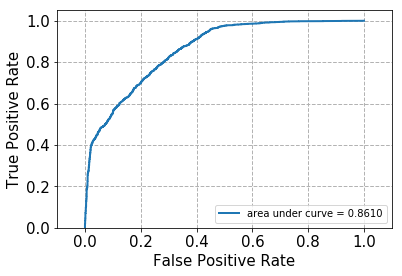

In [13]:
fit_predict_and_plot_roc(pipeline1, X4_train, y4_train, X4_test, y4_test)

In [14]:
pipeline1.fit(X4_train, y4_train)
y4_pred1 = pipeline1.predict(X4_test)
print(confusion_matrix(y4_test, y4_pred1))
print("accuracy:{}".format(accuracy_score(y4_test, y4_pred1)))
print("recall:{}".format(recall_score(y4_test, y4_pred1)))
print("precision:{}".format(precision_score(y4_test, y4_pred1)))

[[1093  906]
 [  95 2312]]
accuracy:0.7728098048116205
recall:0.9605317823016203
precision:0.7184586699813549


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_num at 0x10f9dc048>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=None...ty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

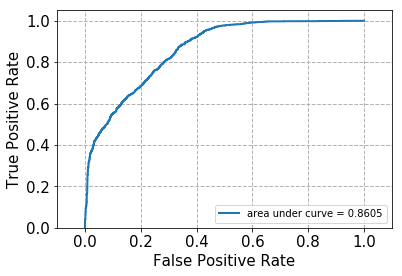

In [15]:
fit_predict_and_plot_roc(pipeline2, X4_train, y4_train, X4_test, y4_test)

In [16]:
pipeline2.fit(X4_train, y4_train)
y4_pred2 = pipeline2.predict(X4_test)
print(confusion_matrix(y4_test, y4_pred2))
print("accuracy:{}".format(accuracy_score(y4_test, y4_pred2)))
print("recall:{}".format(recall_score(y4_test, y4_pred2)))
print("precision:{}".format(precision_score(y4_test, y4_pred2)))

[[1139  860]
 [ 119 2288]]
accuracy:0.7778029959146618
recall:0.9505608641462401
precision:0.7268106734434562


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_num at 0x10f9dc048>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=None...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

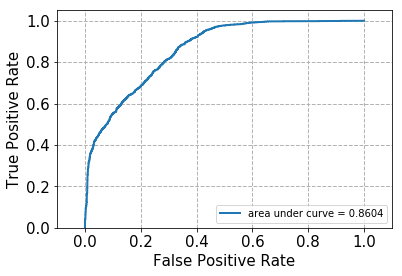

In [17]:
fit_predict_and_plot_roc(pipeline3, X4_train, y4_train, X4_test, y4_test)

In [18]:
pipeline3.fit(X4_train, y4_train)
y4_pred3 = pipeline3.predict(X4_test)
print(confusion_matrix(y4_test, y4_pred3))
print("accuracy:{}".format(accuracy_score(y4_test, y4_pred3)))
print("recall:{}".format(recall_score(y4_test, y4_pred3)))
print("precision:{}".format(precision_score(y4_test, y4_pred3)))

[[1139  860]
 [ 119 2288]]
accuracy:0.7778029959146618
recall:0.9505608641462401
precision:0.7268106734434562


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_num at 0x10f9dc048>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=None...      random_state=0, tol=0.0)), ('toarry', SparseToDenseArray()), ('clf', GaussianNB(priors=None))])

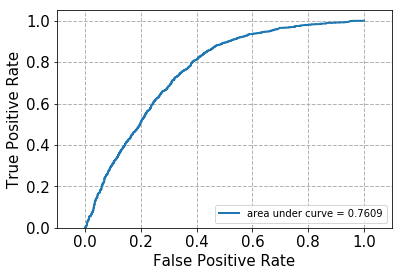

In [19]:
fit_predict_and_plot_roc(pipeline4, X4_train, y4_train, X4_test, y4_test)

In [20]:
pipeline4.fit(X4_train, y4_train)
y4_pred4 = pipeline4.predict(X4_test)
print(confusion_matrix(y4_test, y4_pred4))
print("accuracy:{}".format(accuracy_score(y4_test, y4_pred4)))
print("recall:{}".format(recall_score(y4_test, y4_pred4)))
print("precision:{}".format(precision_score(y4_test, y4_pred4)))

[[1215  784]
 [ 462 1945]]
accuracy:0.7172038129822969
recall:0.8080598255089323
precision:0.7127152803224625


Question 16:

Identify the relationship between influence level and other variables such as the number of followers this account currently has, the number of Tweets (including retweets) issued by the user, the number of Tweets this user has liked in the account’s lifetime, the number of users this account is following. and the number of public lists that this user is a member of using tweets_#nfl.txt.

In [22]:
import glob
datafilenames5 = [i for i in glob.iglob('ECE219_tweet_data/tweets_#nfl.txt')]

feature_selectors5 = {
    'id': '/tweet/user/id_str', #The integer representation of the unique identifier for this User
    'screen_name': '/tweet/user/screen_name', #The screen name, handle, or alias that this user identifies themselves with. screen_names are unique but subject to change. 
    'fo_count': '/tweet/user/followers_count', #The number of followers this account currently has
    'st_count': '/tweet/user/statuses_count',  #The number of Tweets (including retweets) issued by the user
    'fa_count': '/tweet/user/favourites_count', #The number of Tweets this user has liked in the account’s lifetime
    'fr_count': '/tweet/user/friends_count',  #The number of users this account is following
    'li_count': '/tweet/user/listed_count',  #The number of public lists that this user is a member of
    'in_level': '/original_author/influence_level', #level of influence in Twitter commmunity
}

In [25]:
for fn in datafilenames5:
    if os.path.isfile(fn+'2.pkl.gz') and not OVERWRITE_PICKLE_OBJECTS:
        print(fn+'2.pkl.gz'+'\texists.')

    else:
        tweets_features = dict()
        for f in feature_selectors5:
            tweets_features[f] = []

        with open(fn,'rb') as d:
            for ind, line in enumerate(d):
                #if ind > 1000:
                #    break
                tweet_dict = json.loads(line)
                feature_dict = feature_extract(tweet_dict, feature_selectors5)
                for f in feature_dict:
                    tweets_features[f].append(feature_dict[f])
        with gzip.open(fn+'2.pkl.gz','wb') as p:
            pickle.dump(tweets_features,p,protocol=pickle.HIGHEST_PROTOCOL)
        print(fn+'2.pkl.gz'+'\tsaved.')

ECE219_tweet_data/tweets_#nfl.txt2.pkl.gz	saved.


In [27]:
based_dir = 'ECE219_tweet_data/'
with gzip.open(based_dir + 'tweets_#' + 'nfl' +'.txt2.pkl.gz', 'rb') as f:
    features = pickle.load(f)
    df5= pd.DataFrame(features)
df5

,fa_count,fo_count,fr_count,id,in_level,li_count,screen_name,st_count
0,170,33,20,2928895689,NaN,0.0,NFLplayoffs2015,5
1,1504,1320,1335,2863139446,NaN,23.0,scottsddesigns,283
2,474,286,453,246173151,NaN,6.0,nelsenha,1641
3,27,153,590,2931425955,NaN,0.0,Shoppingutensil,69
4,1121,35602,30489,35281083,1.0,817.0,BaxFootballGuru,100951
5,1121,35602,30489,35281083,1.0,817.0,BaxFootballGuru,100953
6,5212,16636,314,276840270,NaN,188.0,BringBackSonics,7808
7,0,1390,30,2417991709,NaN,68.0,ScenesfromSeatt,147583
8,16932,4063,1677,1558625173,NaN,25.0,AFansOpinion_,24920
9,2249,15508,855,736947763,1.0,130.0,PBLiveLaurenLi,2220


In [35]:
df5.isnull().sum()

fa_count            0
fo_count            0
fr_count            0
id                  0
in_level       117593
li_count            1
screen_name         0
st_count            0
dtype: int64

In [39]:
df5_dropna= df5.dropna()
df5_dropna

,fa_count,fo_count,fr_count,id,in_level,li_count,screen_name,st_count
4,1121,35602,30489,35281083,1.0,817.0,BaxFootballGuru,100951
5,1121,35602,30489,35281083,1.0,817.0,BaxFootballGuru,100953
9,2249,15508,855,736947763,1.0,130.0,PBLiveLaurenLi,2220
10,54,124848,2238,17293159,10.0,1028.0,TAYSTEVENS,58021
13,374,2046,2176,133479487,0.0,8.0,joelbeattie,6297
14,6,19482,9834,71745649,10.0,573.0,myvinespot,48546
17,14135,124437,7385,106306522,10.0,1214.0,nflmx,29433
18,9510,1425205,745,17733320,7.0,6398.0,BellaTwins,14665
19,9510,1425188,745,17733320,7.0,6398.0,BellaTwins,14667
20,49,2626,1094,73783787,8.0,116.0,VenturaRic,21471


In [40]:
df5_dropna.sort_values(by=['id'], ascending=True)

,fa_count,fo_count,fr_count,id,in_level,li_count,screen_name,st_count
168205,237,986,1994,100013881,0.0,10.0,elielgraciano,3193
115271,310,157,862,100016252,0.0,2.0,ojtrinder,1243
93995,309,159,860,100016252,0.0,2.0,ojtrinder,1240
144188,399,161,862,100016252,0.0,2.0,ojtrinder,1299
134753,318,160,862,100016252,0.0,2.0,ojtrinder,1252
118958,310,159,862,100016252,0.0,2.0,ojtrinder,1244
118995,310,159,862,100016252,0.0,2.0,ojtrinder,1245
135344,37,16,50,1000176487,2.0,0.0,pgkeeper,154
140860,906,440,195,1000240524,1.0,0.0,Mily_Mili10,2837
153463,245,248,435,100044721,0.0,3.0,LegendenLagoni,1898


In [46]:
len(df5_dropna.id.unique())

36698

In [41]:
#df_tweets = df[i].groupby(pd.Grouper(key='citetime_pst', freq="60Min")).size().reset_index(name='count')
screen_name = df5_dropna.groupby(pd.Grouper(key='id')).agg({'screen_name': 'first'})
fa_count = df5_dropna.groupby(pd.Grouper(key='id')).agg({'fa_count': 'mean'})
fo_count = df5_dropna.groupby(pd.Grouper(key='id')).agg({'fo_count': 'mean'})
fr_count = df5_dropna.groupby(pd.Grouper(key='id')).agg({'fr_count': 'mean'})
li_count = df5_dropna.groupby(pd.Grouper(key='id')).agg({'li_count': 'mean'})
st_count = df5_dropna.groupby(pd.Grouper(key='id')).agg({'st_count': 'mean'})
in_level = df5_dropna.groupby(pd.Grouper(key='id')).agg({'in_level': 'mean'})
    
X5=np.stack(( np.array(fa_count['fa_count'][:-1]),np.array(fo_count['fo_count'][:-1]), 
        np.array(fr_count['fr_count'][:-1]),np.array(li_count['li_count'][:-1]),
        np.array(st_count['st_count'][:-1]),), axis=-1)
y5=np.array(in_level['in_level'][1:])
    
model5 = sm.OLS(y5,X5)
results5 = model5.fit()
print(results5.summary())
print('MSE=', results5.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     444.2
Date:                Sun, 10 Jun 2018   Prob (F-statistic):               0.00
Time:                        23:27:49   Log-Likelihood:                -97154.
No. Observations:               36697   AIC:                         1.943e+05
Df Residuals:                   36692   BIC:                         1.944e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          6.934e-05    3.9e-06     17.797      0.0

Influence level is closely related to all five variables identified (the number of followers this account currently has, the number of Tweets (including retweets) issued by the user, the number of Tweets this user has liked in the account’s lifetime, the number of users this account is following. and the number of public lists that this user is a member of). However liner regression seems to be a bad model to simulate this relationship based on the low R-squared value.